In [1]:
import numpy as np
from sympy import var
from matplotlib import pyplot as plt
from tqdm.auto import tqdm
from scipy import integrate
from numba import jit
import scipy
from classy import Class
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Polygon

import sys
sys.path.append('bk_terms/')
sys.path.append('Library/')

#import functions 
from WS_cosmo import *
from useful_funcs import *

# Import the plot style settings
%run Library/plot_style          #import Library.plot_style#
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rc('font', size='22')

In [2]:
def get_cosmo(h,Omega_b,Omega_cdm,Omega_m,A_s,n_s,sigma8=0):
    
    #Create a params dictionary
    params = {'output':'mPk,mTk',
                 'non linear':'halofit',
                 'Omega_b':Omega_b,
                 'Omega_cdm':Omega_cdm,#Omega_m-Omega_b,#
                 'h':h,
                 'n_s':n_s,
                 'A_s':A_s,#'n_s':n_s,'sigma8':0.828,#
                 'P_k_max_1/Mpc':k_max,
                 'z_max_pk':10. #Default value is 10
    }
    if sigma8 !=0:
        params = {'output':'mPk,mTk',
                 'non linear':'halofit',
                 'Omega_b':0.02242/h**2,
                 'Omega_cdm':Omega_m-Omega_b,#Omega_cdm,#
                 'h':h,
                 'n_s':n_s,
                 'sigma8':0.828,#'A_s':A_s,#'n_s':n_s,
                 'P_k_max_1/Mpc':k_max,
                 'z_max_pk':10. #Default value is 10
                 }
        

    #Initialize the cosmology and compute everything
    cosmo = Class()
    cosmo.set(params)
    cosmo.compute()
    
    return cosmo
#Need to specify the max wavenumber
k_max = 10 #UNITS: 1/Mpc # is also set to 10 later
#Start by specifying the cosmology  - planck best fit
h = 0.6766
Omega_b = 0.02242/h**2
Omega_cdm = 0.11933/h**2
Omega_m = Omega_cdm+Omega_b
A_s = 2.105e-9 
n_s = 0.9665

cosmo = get_cosmo(h,Omega_b,Omega_cdm,Omega_m,A_s,n_s)

#scoccimarro and noorikuhani cosmology
Omega_m = 0.32
sigma8 = 0.828
n_s = 0.968

#cosmo_noor = get_cosmo(h,Omega_b,Omega_cdm,Omega_m,A_s,n_s,sigma8=sigma8)



In [3]:
cosmo_functions = CosmologicalFunctions(cosmo)

#load in preset surveys 
survey_params = SurveyParams(cosmo)
Euclid_dict = survey_params.get_surveybias('Euclid')
BGS_dict = survey_params.get_surveybias('BGS')
SKAO1_dict = survey_params.get_surveybias('SKAO1')
SKAO2_dict = survey_params.get_surveybias('SKAO2')


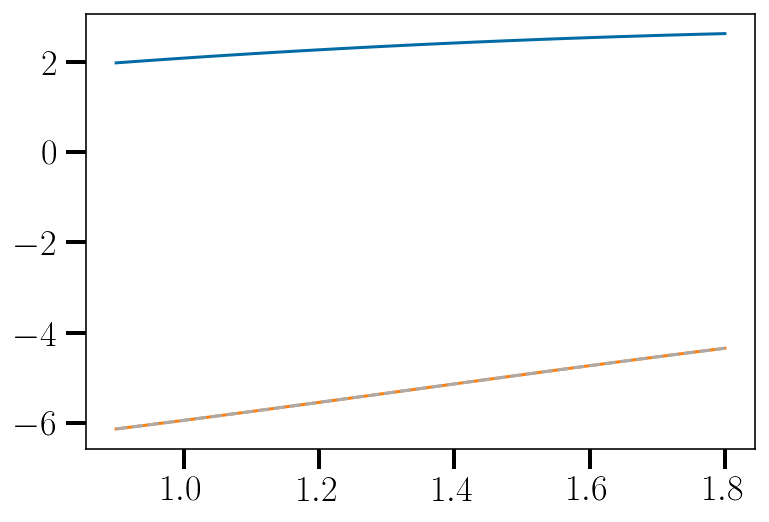

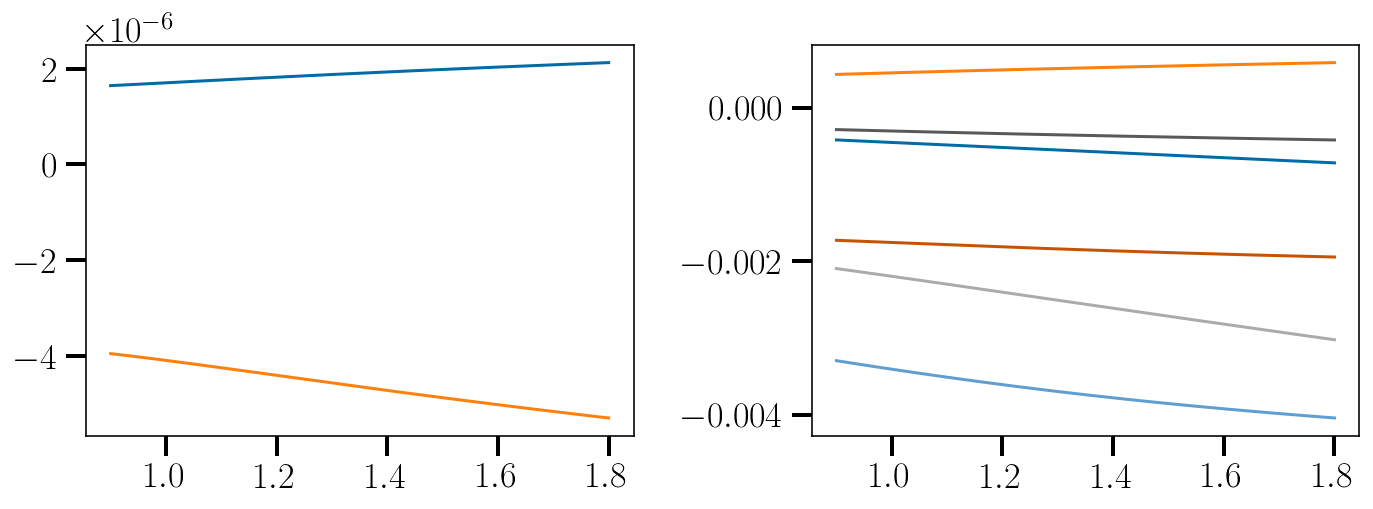

In [4]:
z_plot = np.linspace(0.9,1.8)
#plt.plot(z_plot,cosmo_functions.b_1(z_plot))
#plt.plot(z_plot,cosmo_functions.b_2(z_plot))
#plt.plot(z_plot,cosmo_functions.g_2(z_plot))

cosmo_functions = CosmologicalFunctions(cosmo,survey_params=Euclid_dict)
plt.plot(z_plot,cosmo_functions.Q_survey(z_plot))
plt.plot(z_plot,cosmo_functions.be_survey(z_plot))

plt.plot(z_plot,cosmo_functions.be_survey(z_plot),'--')
#cosmo_functions = CosmologicalFunctions(cosmo,'BGS')
#plt.plot(cosmo_functions.z_survey,cosmo_functions.Q_survey(cosmo_functions.z_survey),'--')
#plt.plot(cosmo_functions.z_survey,cosmo_functions.be_survey(cosmo_functions.z_survey),'--')

if True:
    cosmo_functions = CosmologicalFunctions(cosmo,survey_params=Euclid_dict)
    betas = cosmo_functions.get_beta_funcs(z_plot)
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    z_euclid = np.linspace(0.9,1.8,300)
    #axs[0].plot(z_euclid,cosmo_functions.beta[13](z_euclid))
    #axs[0].plot(z_euclid,cosmo_functions.beta[12](z_euclid))
    axs[0].plot(z_euclid,cosmo_functions.beta[11](z_euclid))
    #axs[0].plot(z_euclid,cosmo_functions.beta[10](z_euclid))
    #axs[0].plot(z_euclid,cosmo_functions.beta[9](z_euclid))
    axs[0].plot(z_euclid,cosmo_functions.beta[8](z_euclid))
    #axs[0].plot(z_euclid,cosmo_functions.beta[7](z_euclid))
    #axs[0].plot(z_euclid,cosmo_functions.beta[6](z_euclid))


    axs[1].plot(z_euclid,cosmo_functions.beta[14](z_euclid))
    axs[1].plot(z_euclid,cosmo_functions.beta[15](z_euclid))
    axs[1].plot(z_euclid,cosmo_functions.beta[16](z_euclid))
    axs[1].plot(z_euclid,cosmo_functions.beta[17](z_euclid))
    axs[1].plot(z_euclid,cosmo_functions.beta[18](z_euclid))
    axs[1].plot(z_euclid,cosmo_functions.beta[19](z_euclid))
    #axs[1].plot(z_euclid,cosmo_functions.betad[16](z_euclid))

    plt.tight_layout()
    plt.show()

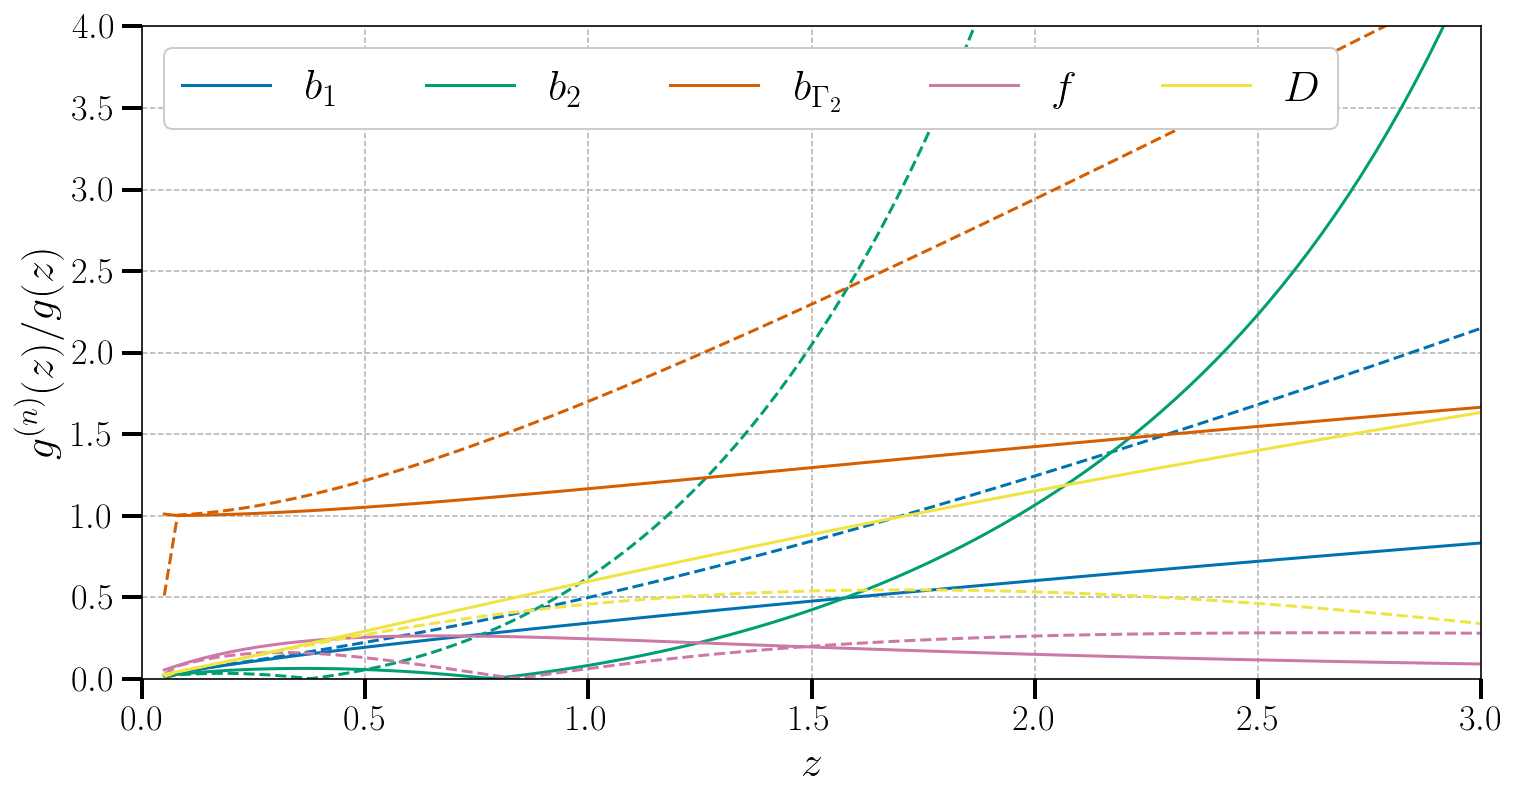

In [5]:
#plot ratio of derivates of biases to normal term which repersents the rough size of derivative terms to wide-angle terms
plt.figure(figsize=(12,6))

cosmo_functions = CosmologicalFunctions(cosmo)
z_plot = np.linspace(0.05,3,100)
derivs = cosmo_functions.get_derivs(z_plot)

plt.plot(z_plot,np.abs(cosmo_functions.b1_d(z_plot)/cosmo_functions.b_1(z_plot)),color=colors[0],label='$b_1$')
plt.plot(z_plot,np.abs(cosmo_functions.b1_dd(z_plot)/cosmo_functions.b_1(z_plot)),'--',color=colors[0])

plt.plot(z_plot,np.abs(cosmo_functions.b2_d(z_plot)/cosmo_functions.b_2(z_plot)),color=colors[1],label='$b_2$')
plt.plot(z_plot,np.abs(cosmo_functions.b2_dd(z_plot)/cosmo_functions.b_2(z_plot)),'--',color=colors[1])

plt.plot(z_plot,np.abs(cosmo_functions.g2_d(z_plot)/cosmo_functions.g_2(z_plot)),color=colors[2],label='$b_{\Gamma_2}$')
plt.plot(z_plot,np.abs(cosmo_functions.g2_dd(z_plot)/cosmo_functions.g_2(z_plot)),'--',color=colors[2])

plt.plot(z_plot,np.abs(cosmo_functions.f_d(z_plot)/cosmo_functions.f_intp(z_plot)),color=colors[3],label='$f$')
plt.plot(z_plot,np.abs(cosmo_functions.f_dd(z_plot)/cosmo_functions.f_intp(z_plot)),'--',color=colors[3])

plt.plot(z_plot,np.abs(cosmo_functions.D_d(z_plot)/cosmo_functions.D_intp(z_plot)),color=colors[4],label='$D$')
plt.plot(z_plot,np.abs(cosmo_functions.D_dd(z_plot)/cosmo_functions.D_intp(z_plot)),'--',color=colors[4])

plt.grid(ls='--',lw=0.75)
plt.ylabel('$g^{(n)}(z)/g(z)$')
plt.xlabel('$z$')
plt.ylim(0,4)
plt.xlim(0,3)
plt.legend(ncol=5,framealpha=1)

In [6]:
#lets define our set triangle configs

def equilateral():
    k1 = k2 = k3 = 0.01
    theta = np.arccos((k3**2 - k1**2 - k2**2)/(2*k1*k2))
    return k1,k2,k3,theta

def equilateral_arr(kmin=1e-3,kmax=2e-1):
    k1 = k2 = k3 = np.linspace(kmin,kmax)
    theta = np.arccos((k3**2 - k1**2 - k2**2)/(2*k1*k2))
    return k1,k2,k3,theta

def folded():
    k1 = 0.02
    k3 = k2 = k1/2
    theta = np.arccos((k3**2 - k1**2 - k2**2)/(2*k1*k2))
    return k1,k2,k3,theta

def squeezed():
    k1 = k2 = 0.01
    k3 = k1/10
    theta = np.arccos((k3**2 - k1**2 - k2**2)/(2*k1*k2))
    return k1,k2,k3,theta

## Import expression for each contributions

In [7]:

from WA1 import *
from WA2 import *
from RR1 import *
from RR2 import *
from WARR import *

from WSGR import *
from GR1 import *
from GR2 import *
from GR0 import *
from PNG import *

from cov import COV as COV 

In [19]:
#also have mu dependent expressions
from WA_1 import *

### define composite functions naming convention is important for some funcs

In [9]:
class WA_RR:#for all wide separation
    def l0(params,derivs,r,s):
        return WA2.l0(params,r,s)+WARR.l0(params,derivs,r,s)+RR2.l0(params,derivs,r,s)
    
    def l1(params,derivs,r,s):
        return WA1.l1(params,r,s) + RR1.l1(params,derivs,r,s)
    
    def l2(params,derivs,r,s):
        return WA2.l2(params,r,s)+WARR.l2(params,derivs,r,s)+RR2.l2(params,derivs,r,s)
    
class WA_RR_GR:
    def l0(params,derivs,betas,r,s):
        return WA2.l0(params,r,s) +RR2.l0(params,derivs,r,s)+GR2.l0(params,betas)+WAGR.l0(params,betas,r,s)+WARR.l0(params,derivs,r,s)+RRGR.l0(params,derivs,betas,r,s)
    
    def l1(params,derivs,betas,r,s):
        return WA1.l1(params,r,s) +RR1.l1(params,derivs,r,s)+GR1.l1(params,betas)
    

In [17]:
%%time
k2 = np.linspace(0.01,0.04)
k1 = k3 = 0.04
theta = np.arccos((k3**2 - k1**2 - k2**2)/(2*k1*k2))

zz=1
theta_= theta[..., None, None]
k1_= k1#[..., None, None]
k2_= k2[..., None, None]

cosmo_functions = CosmologicalFunctions(cosmo)#,'DESI'
params = cosmo_functions.get_params(k1_,k2_,theta_,zz)
derivs = cosmo_functions.get_derivs(zz)
betas = cosmo_functions.get_beta_funcs(zz)
    
l=1
m=0
WA1_arr = numeric_ylm(WA_1,l,m,params,derivs,betas,dfog=False,type_=0)
params = cosmo_functions.get_params(k1,k2,theta,zz)

CPU times: user 981 ms, sys: 8.5 ms, total: 989 ms
Wall time: 989 ms


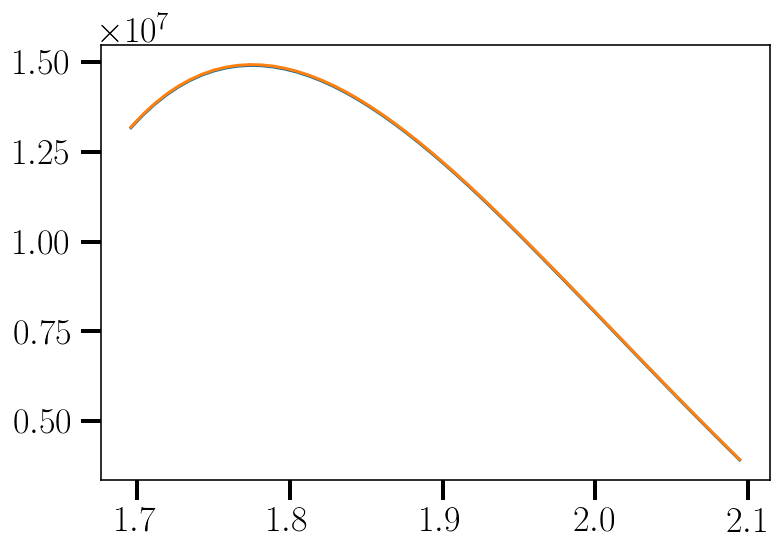

In [18]:
plt.plot(theta,WA1_arr.imag)
plt.plot(theta,WA1.l1(params,0,0).imag)

# effective fnl part

In [40]:
fnl = np.linspace(-40,10,int(1e+5))
fnl_ = fnl[::,np.newaxis]

zz=1
k1 = np.linspace(0.05,0.1,200)
k2= k1
k3 = 0.005

theta = np.arccos((k3**2 - k1**2 - k2**2)/(2*k1*k2))

cosmo_functions = CosmologicalFunctions(cosmo,survey_params=Euclid_dict)
params = cosmo_functions.get_params(k1,k2,theta,zz)
derivs = cosmo_functions.get_derivs(zz)
betas = cosmo_functions.get_beta_funcs(zz)

#get mesh for fnl
theta_ = theta[np.newaxis,::]
k1_ = k1[np.newaxis,::]

params_ = cosmo_functions.get_params(k1_,k2,theta_,zz)
PNGparams = cosmo_functions.get_PNGparams(fnl_,zz,k1_,k2,k3)

PNG_term = PNG.l0(params,PNGparams)-GR0.l0(params)


def find_fnl(PNG_term,term):
    
    mins = np.argmin(np.abs(PNG_term-term),axis=(0))
    
    return fnl[mins]
#print(PNG_term.shape)

In [41]:
r=s=1/3
fnl_WA = find_fnl(PNG_term,WA2.l0(params,r,s))
fnl_RR = find_fnl(PNG_term,RR2.l0(params,derivs,r,s))
fnl_WARR = find_fnl(PNG_term,WARR.l0(params,derivs,r,s))
fnl_WAGR = find_fnl(PNG_term,WAGR.l0(params,betas,r,s))
fnl_RRGR = find_fnl(PNG_term,RRGR.l0(params,derivs,betas,r,s))
fnl_WS = find_fnl(PNG_term,WA2.l0(params,r,s)+RR2.l0(params,derivs,r,s)+WARR.l0(params,derivs,r,s)+WAGR.l0(params,betas,r,s)+RRGR.l0(params,derivs,betas,r,s))
fnl_GR2 = find_fnl(PNG_term,GR2.l0(params,betas))

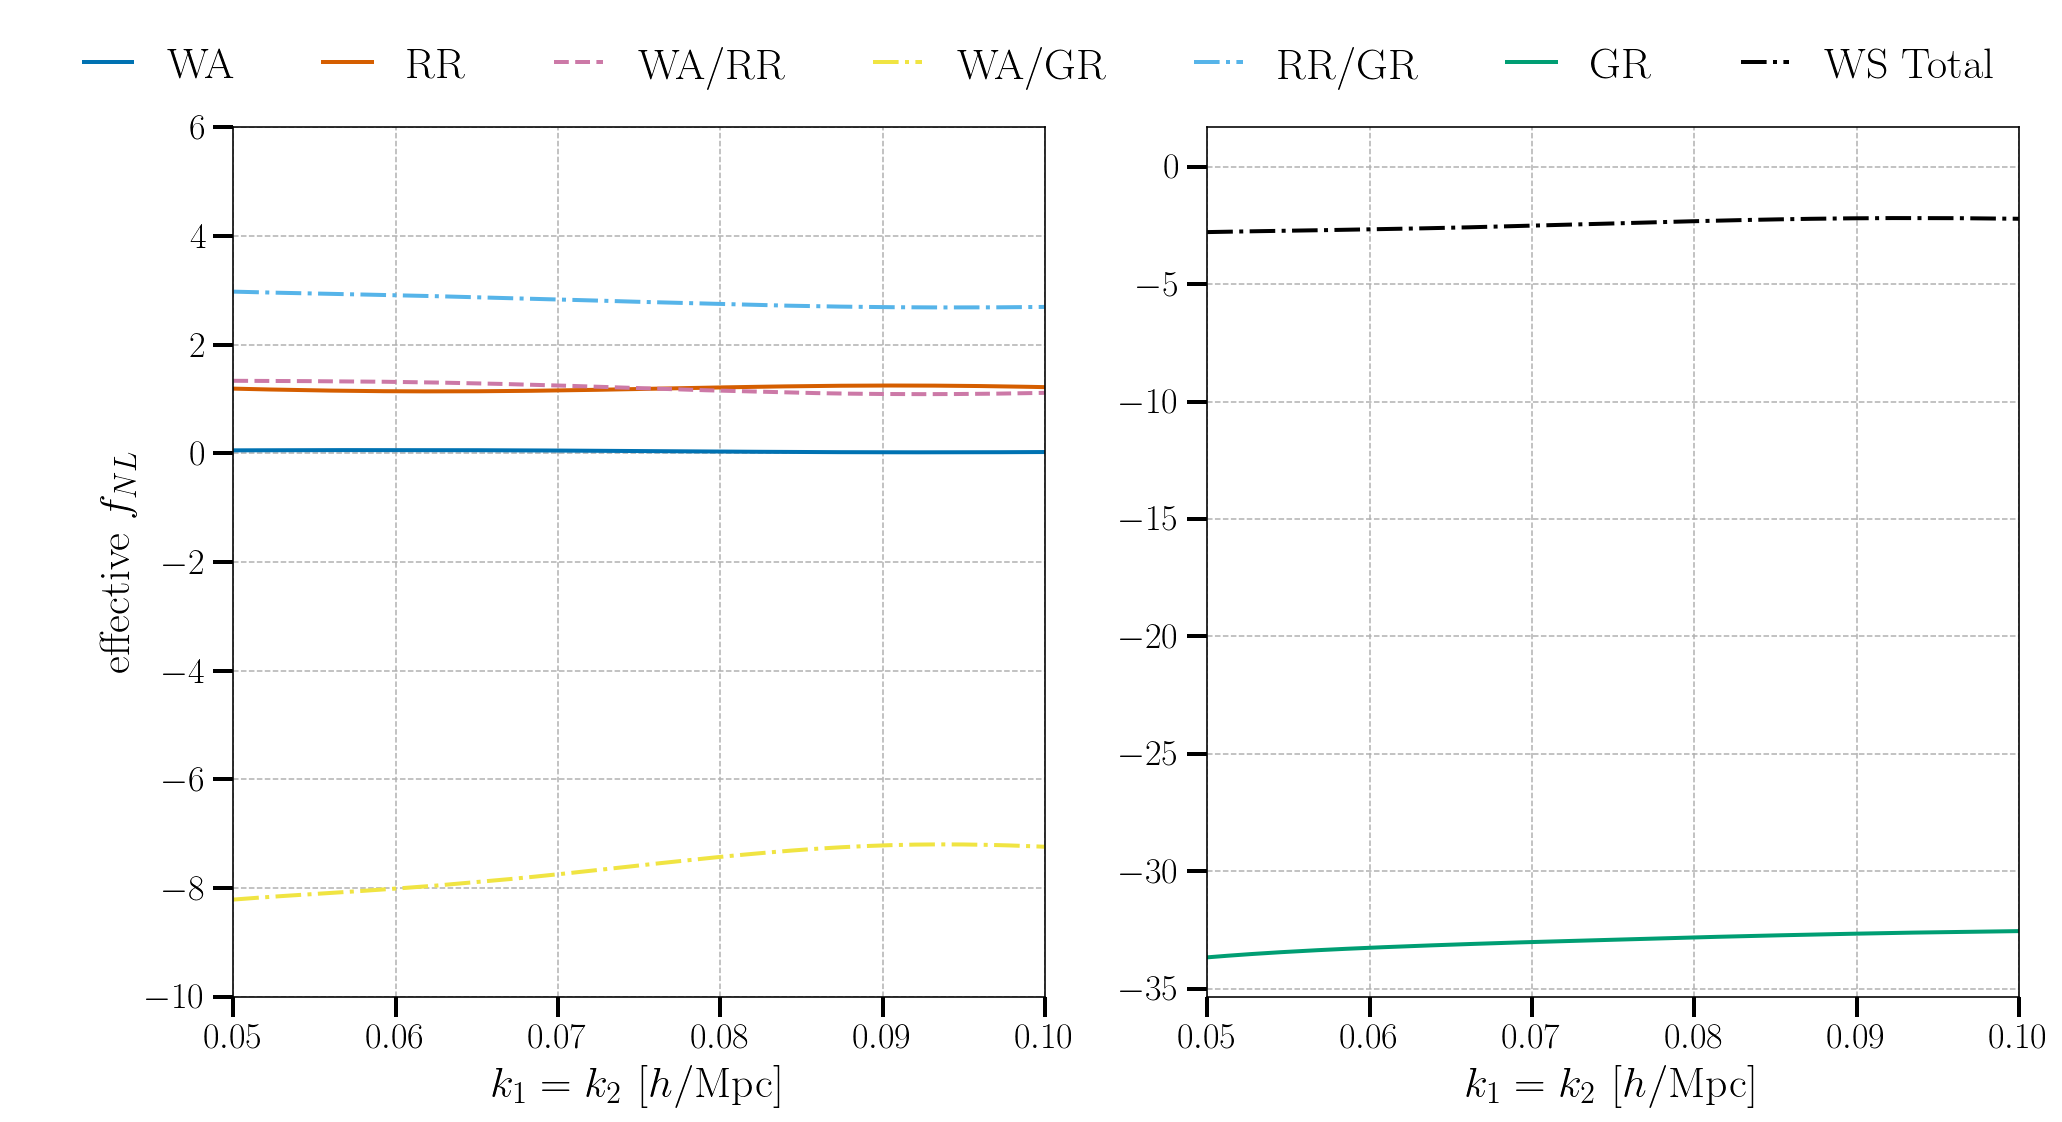

In [42]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

r=1/3;s=1/3

axs[0].plot(k1,fnl_WA,'-',label='WA',color=colors[0],linewidth=2)
axs[0].plot(k1,fnl_RR,'-',label='RR',color=colors[2],linewidth=2)
axs[0].plot(k1,fnl_WARR,'--',label='WA/RR',color=colors[3],linewidth=2)
axs[0].plot(k1,fnl_WAGR,'-.',label='WA/GR',color=colors[4],linewidth=2)
axs[0].plot(k1,fnl_RRGR,'-.',label='RR/GR',color=colors[5],linewidth=2)

axs[1].plot(k1,fnl_GR2,'-',label='GR',color=colors[1],linewidth=2)
axs[1].plot(k1,fnl_WS,'-.',label='WS Total',color='black',linewidth=2)

for i in range(2):
    axs[i].set_xlabel('$ k_1=k_2 \,\,[h/\mathrm{Mpc}]$')
    axs[i].plot(k3,np.zeros_like(k3),'--', color='black')
    axs[i].grid(ls='--',lw=0.75)
    axs[i].set_xlim(0.05,0.10)

axs[0].set_ylabel('effective $f_{NL}$')
axs[0].set_ylim(-10,6)

fig.legend(loc=[0.03,0.9],ncol=7,frameon=False,title_fontsize=15,handlelength=1.1, handleheight=1, borderpad=0.5)

#plt.plot(k1,np.zeros_like(k1),'--', color='black')

#plt.savefig('plots/effective_fNL.png', bbox_inches='tight', dpi=400)
plt.show()

## General plots

Text(0, 0.5, '$ \\text{Imag}[B_{\\ell=1}(k1=0.1,k2=0.05)]/B_0 $')

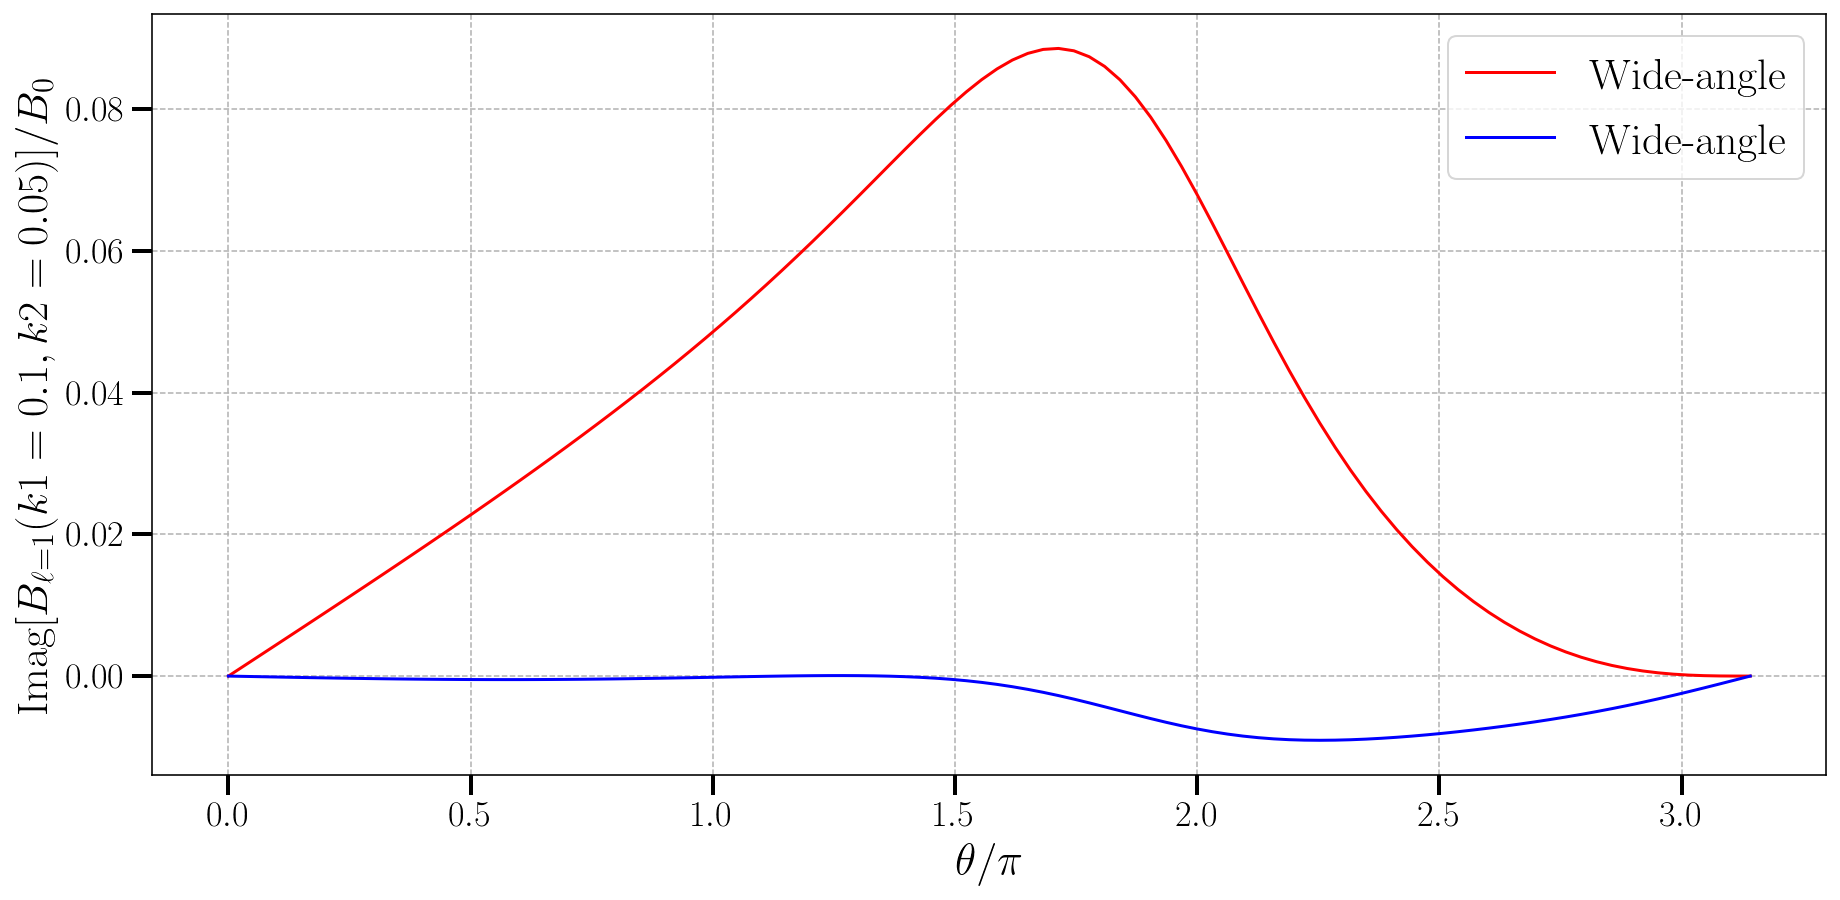

In [43]:
plt.figure(figsize=(15,7))

#ok get some equilateral triangles...
if False:
    k1 = np.geomspace(1e-4,1,1000)
    k2 = 0.9*k1
    k3 = 0.5*k1
    theta = np.arccos((k3**2 - k1**2 - k2**2)/(2*k1*k2))
else:
    k1=0.04;k2=k1/2
    theta = np.linspace(0,np.pi,100)#2*np.pi/3#np.pi#
    k3 = np.sqrt(k1**2 + k2**2 + 2*k1*k2*np.cos(theta))


theta_= theta[..., None, None]

zz=1

cosmo_functions = CosmologicalFunctions(cosmo,survey_params=Euclid_dict)
params = cosmo_functions.get_params(k1,k2,theta,zz)
params2 = cosmo_functions.get_params(k1,k2,theta_,zz)
derivs = cosmo_functions.get_derivs(zz)
betas = cosmo_functions.get_beta_funcs(zz)



r=0;s=0
#plt.plot(theta,(RR1.l1(params,derivs,r,s).imag)/GR0.l0(params),'-',color='red',label='RR')
#plt.plot(theta,WA1.l1(params,r,s).imag/GR0.l0(params),'-',color='blue',label='Wide-angle')
plt.plot(theta,GR1.l1m1(params,betas).imag/GR0.l0(params),'-',color='red',label='Wide-angle')
plt.plot(theta,RR1.l1m1(params,derivs,r,s).imag/GR0.l0(params),'-',color='blue',label='Wide-angle')
#plt.plot(theta,numeric_ylm(WA.full_1,1,1,params=params2,dfog=False,type_=0).imag/GR0.l0(params),'--',color='black')

#plt.ylim(-1,1)
#plt.xlim(0,1)
plt.grid(ls='--',lw=0.75)

plt.legend()
plt.xlabel(r'$\theta/ \pi\,$')
plt.ylabel(r'$ \text{Imag}[B_{\ell=1}(k1=0.1,k2=0.05)]/B_0 $')

In [698]:
zz=0.5

k1 = np.linspace(0.05,0.1)
k3 = k1
k2= 0.01
theta = np.arccos((k3**2 - k1**2 - k2**2)/(2*k1*k2))
#k3 = np.sqrt(k1**2 + k2**2 + 2*k1*k2*np.cos(theta))

cosmo_functions = CosmologicalFunctions(cosmo,survey_params=BGS_dict)#
params = cosmo_functions.get_params(k1,k2,theta,zz)
derivs = cosmo_functions.get_derivs(zz)
betas = cosmo_functions.get_beta_funcs(zz)
PNGparams = cosmo_functions.get_PNGparams(100,zz,k1,k2,k3)


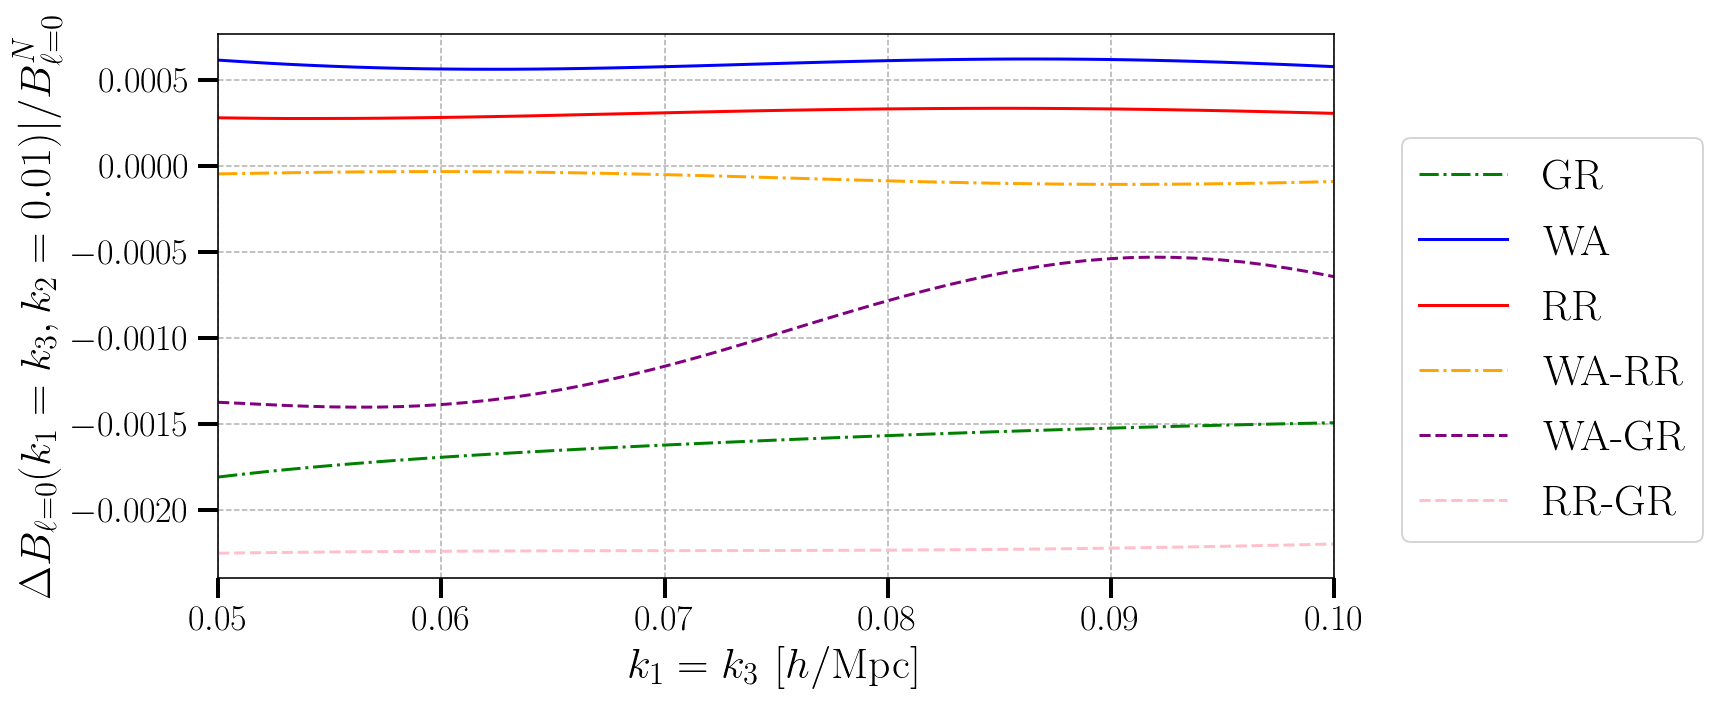

In [699]:
#so lets plot monopole...
plt.figure(figsize=(10,5))
r=0;s=0

justWS=WA2.l0(params,r,s)+RR2.l0(params,derivs,r,s)+WARR.l0(params,derivs,r,s)
#totalws = justwaRR+WAGR.l0(params,betas,r,s)+RRGR.l0(params,derivs,betas,r,s)
plt.plot(k3,GR2.l0(params,betas)/2/GR0.l0(params),'-.',label='GR',color='green')

plt.plot(k3,WA2.l0(params,r,s)/GR0.l0(params),'-',label='WA',color='blue')
plt.plot(k3,RR2.l0(params,derivs,r,s)/GR0.l0(params),'-',label='RR',color='red')
plt.plot(k3,WARR.l0(params,derivs,r,s)/GR0.l0(params),'-.',label='WA-RR',color='orange')

plt.plot(k3,WAGR.l0(params,betas,r,s)/GR0.l0(params),'--',label='WA-GR',color='purple')
plt.plot(k3,RRGR.l0(params,derivs,betas,r,s)/GR0.l0(params),'--',label='RR-GR',color='pink')


#plt.plot(k3,totalwa/GR0.l0(params),'--',color='black',label='RR+WA')
#plt.plot(k3,justwaRR/GR0.l0(params),'-',color='red',label='RR+WA')
#plt.plot(k3,total/GR0.l0(params),label='RR+WA+GR',color='black')
plt.xlabel('$ k_1=k_3 \,\,[h/\mathrm{Mpc}]$')
plt.ylabel(r'$\Delta B_{\ell=0}(k_1=k_3,k_2=0.01)|/B^N_{\ell=0}$')
#plt.plot(k3,np.zeros_like(k3),'--', color='black')
#plt.text(0.1,0.6,r"z=0.4 - DESI-like")
plt.xlim(0.05,0.10)
plt.legend(bbox_to_anchor=(0.85, 0.35, 0.5, 0.5))
plt.grid(ls='--',lw=0.75)
#plt.ylim(0,0.003)
plt.savefig('plots/second_order_lots.png', bbox_inches='tight', dpi=400)
plt.show()

In [ ]:
#test GR:
zz=1
k1 = np.linspace(0.0006,0.5,1000)
k3 = k1/2
k2= k1
theta = np.arccos((k3**2 - k1**2 - k2**2)/(2*k1*k2))
#k3 = np.sqrt(k1**2 + k2**2 + 2*k1*k2*np.cos(theta))

cosmo_functions = CosmologicalFunctions(cosmo,survey_params=Euclid_dict)
params = cosmo_functions.get_params(k1,k2,theta,zz)
derivs = cosmo_functions.get_derivs(zz)
betas = cosmo_functions.get_beta_funcs(zz)
PNGparams = cosmo_functions.get_PNGparams(1,zz,k1,k2,k3)

plt.figure(figsize=(10,6))
r=0;s=0

#plt.plot(k3,np.abs(GR2.l0(params,betas)),'-.',label='GR',color='green')
#plt.plot(k3,np.abs(WA2.l0(params,r,s)),'--',label='Wide-angle',color='blue')
plt.plot(k3,np.abs(RR2.l0(params,derivs,r,s)),'--',label='redshift derivative',color='red')
#plt.plot(k3,np.abs(WARR.l0(params,derivs,r,s)),'-.',label='Mixed',color='orange')
#plt.plot(k3,(PNG.l0(params,PNGparams)-GR0.l0(params)),'--',color='grey')
#plt.plot(k3,np.abs(WAGR.l0(params,betas,r,s)),'--',label='Wide-angle',color='purple')
#plt.plot(k3,np.abs(RRGR.l0(params,derivs,betas,r,s)),'--',label='Wide-angle',color='lime')


plt.xscale('log')
plt.yscale('log')
plt.grid(ls='--',lw=0.75)
plt.legend()
plt.show()

In [135]:
from matplotlib.patches import Polygon
def plot_3x2(first=True):
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

    # Create subplots with custom aspect ratios
    #axs = [fig.add_subplot(gs[0, i], aspect='10') for i in range(2)]  # Subplots in the first row

    #horizonatally
    for i in range(2):
        axs[0,i].get_xaxis().set_tick_params(which='both', size=0, labelsize=0)
        axs[1,i].get_xaxis().set_tick_params(which='both', size=0, labelsize=0)

    #vertically
    for i in range(3):
        axs[i,0].set_xticks(np.arange(0.1, 0.59, 0.2))
        axs[i,1].set_xticks(np.arange(0.9, 1.81, 0.3))

        #set triangle
        if i ==0: #
            k1 = 0.01
            k2 = k3 = k1
            theta = np.arccos((k3**2 - k1**2 - k2**2)/(2*k1*k2))
        elif i==1: # folded
            k1 = 0.02
            k2 = k3 = 0.01
            theta = np.arccos((k3**2 - k1**2 - k2**2)/(2*k1*k2))
        else: #squeezed
            k1 = k2 = 0.05
            k3 = 0.005
            theta = np.arccos((k3**2 - k1**2 - k2**2)/(2*k1*k2))

        for j in range(2):
            #choose which survey
            if j ==0:
                cosmo_functions = CosmologicalFunctions(cosmo,survey_params=BGS_dict)#SKAO2
                axs[0,j].text(0.25,1.1,'DESI-like BGS',fontsize=20)
            else:
                cosmo_functions = CosmologicalFunctions(cosmo,survey_params=Euclid_dict)
                axs[0,j].text(1.15,1.1,r'Euclid-like H$\alpha$',fontsize=20)
            z_plot = cosmo_functions.z_survey

            params = cosmo_functions.get_params(k1,k2,theta,z_plot)
            derivs = cosmo_functions.get_derivs(z_plot)
            betas = cosmo_functions.get_beta_funcs(z_plot)

            norm = GR0.l0(params)
            
            #plot different contributions
            if first:#for first order stuff
                r=0;s=0
                axs[i,j].set_ylim(1.0001e-3,.9)
                axs[i,j].plot(z_plot,np.abs(GR1.l1(params,betas)/norm),'-',linewidth=3,label='GR',color=colors[1])
                axs[i,j].plot(z_plot,np.abs(WA1.l1(params,r,s)/norm),'-',linewidth=2.25,label='WA',color=colors[0])
                axs[i,j].plot(z_plot,np.abs(RR1.l1(params,derivs,r,s)/norm),'-',linewidth=1.5,label='RR',color=colors[2])
                axs[1,0].set_ylabel('$|B_{(1,0)}|/B^N_{(0,0)}$')
                axs[0,1].legend(ncol=3,frameon=False,title_fontsize=12,handlelength=1,columnspacing=1,handleheight=0.5, borderpad=0)

            else:#for second order stuff
                r=s=1/3
                axs[i,j].set_ylim(5e-4,.9)#axs[i,j].set_ylim(5e-3,2)#
                #axs[i,j].plot(z_plot,np.abs(totalwa/GR0.l0(params)),'--',label='Total',color='black')
                #axs[i,j].plot(z_plot,np.abs(total/GR0.l0(params)),label='Total',color='black')
                if i ==0 and j ==0:
                    axs[i,j].plot(z_plot,np.abs(GR2.l0(params,betas)/norm),'-',label='GR',color=colors[1])

                    axs[i,j].plot(z_plot,np.abs(WA2.l0(params,r,s)/norm),'-',label='WA',color=colors[0])
                    axs[i,j].plot(z_plot,np.abs(RR2.l0(params,derivs,r,s)/norm),'-',label='RR',color=colors[2])
                    axs[i,j].plot(z_plot,np.abs(WARR.l0(params,derivs,r,s)/norm),'--',label='WA/RR',color=colors[3])

                    axs[i,j].plot(z_plot,np.abs(WAGR.l0(params,betas,r,s)/norm),'-.',label='WA/GR',color=colors[4])
                    axs[i,j].plot(z_plot,np.abs(RRGR.l0(params,derivs,betas,r,s)/norm),'-.',label='RR/GR',color=colors[5])
                else:
                    axs[i,j].plot(z_plot,np.abs(GR2.l0(params,betas)/norm),'-',color=colors[2])

                    axs[i,j].plot(z_plot,np.abs(WA2.l0(params,r,s)/norm),'-',color=colors[0])
                    axs[i,j].plot(z_plot,np.abs(RR2.l0(params,derivs,r,s)/norm),'-',color=colors[1])
                    axs[i,j].plot(z_plot,np.abs(WARR.l0(params,derivs,r,s)/norm),'--',color=colors[3])

                    axs[i,j].plot(z_plot,np.abs(WAGR.l0(params,betas,r,s)/norm),'-.',color=colors[4])
                    axs[i,j].plot(z_plot,np.abs(RRGR.l0(params,derivs,betas,r,s)/norm),'-.',color=colors[5])

                axs[1,0].set_ylabel('$|\Delta B_{(0,0)}|/B^N_{(0,0)}$')
                fig.legend(loc=[0.05,0.95],ncol=6,frameon=False,title_fontsize=12,handlelength=1, columnspacing=1, handleheight=0.5, borderpad=0)
                #xs[0,1].legend(ncol=1,frameon=False,title_fontsize=15,handlelength=1.1, handleheight=0.5, borderpad=0)

            
            #we plot scale where it breaks down
            chi = 2*np.pi/k3
            axs[i,0].vlines(cosmo_functions.d_to_z(chi),0,1e+10,linestyles='--',color='black',alpha=1)
            
            axs[i,j].set_yscale('log')
            
            axs[i, j].grid(ls='--', lw=0.75, color='k', alpha=0.2)
            
            axs[2,j].set_xlabel('$z$')
                        
            axs[i,1].get_yaxis().set_tick_params(which='both', size=0, labelsize=0)
            
    
    def triple_triangle_coords(base_x=0.4,base_y=0.5):
        triangle_coords = {
            0: np.array([[base_x+0.05, base_y +0.1-0.3*np.sin(np.pi/3)], [base_x+0.2, base_y+0.1], [base_x+0.35, base_y +0.1-0.3*np.sin(np.pi/3)]]),  # Equilateral triangle
            1: np.array([[base_x, base_y-0.05], [base_x+0.2, base_y+0.05], [base_x+0.4, base_y-0.05]]),  # Folded triangle
            2: np.array([[base_x, base_y-0.05], [base_x+0.4, base_y+0.05], [base_x+0.4, base_y-0.05]])   # Squeezed triangle
        }
        return triangle_coords
    
    triangle_labels = {0: 'Equilateral', 1: 'Folded', 2: 'Squeezed'}
    
    base_x,base_y = 0.4,0.5
    # Plot the triangles on the additional axis
    for i in range(3):
        
        # Create an additional axis for the triangles
        ax_triangles = fig.add_axes([0.8, 0.6-0.25*i, 0.3, 0.3], frameon=False)
        ax_triangles.set_xticks([])
        ax_triangles.set_yticks([])
    
        triangle = Polygon(triple_triangle_coords(0.4,0.5)[i], closed=True, fill=None, edgecolor='black')
        ax_triangles.add_patch(triangle)
        ax_triangles.text(base_x, base_y+0.15, triangle_labels[i])

    fig.subplots_adjust(hspace=0)
    fig.subplots_adjust(wspace=0)
    if first:
        plt.savefig('plots/redshift_first.png', bbox_inches='tight', dpi=400)
    else:
        plt.savefig('plots/redshift_second.png', bbox_inches='tight', dpi=400)

#plot_3x2(False)


No handles with labels found to put in legend.


hello
hello
hello


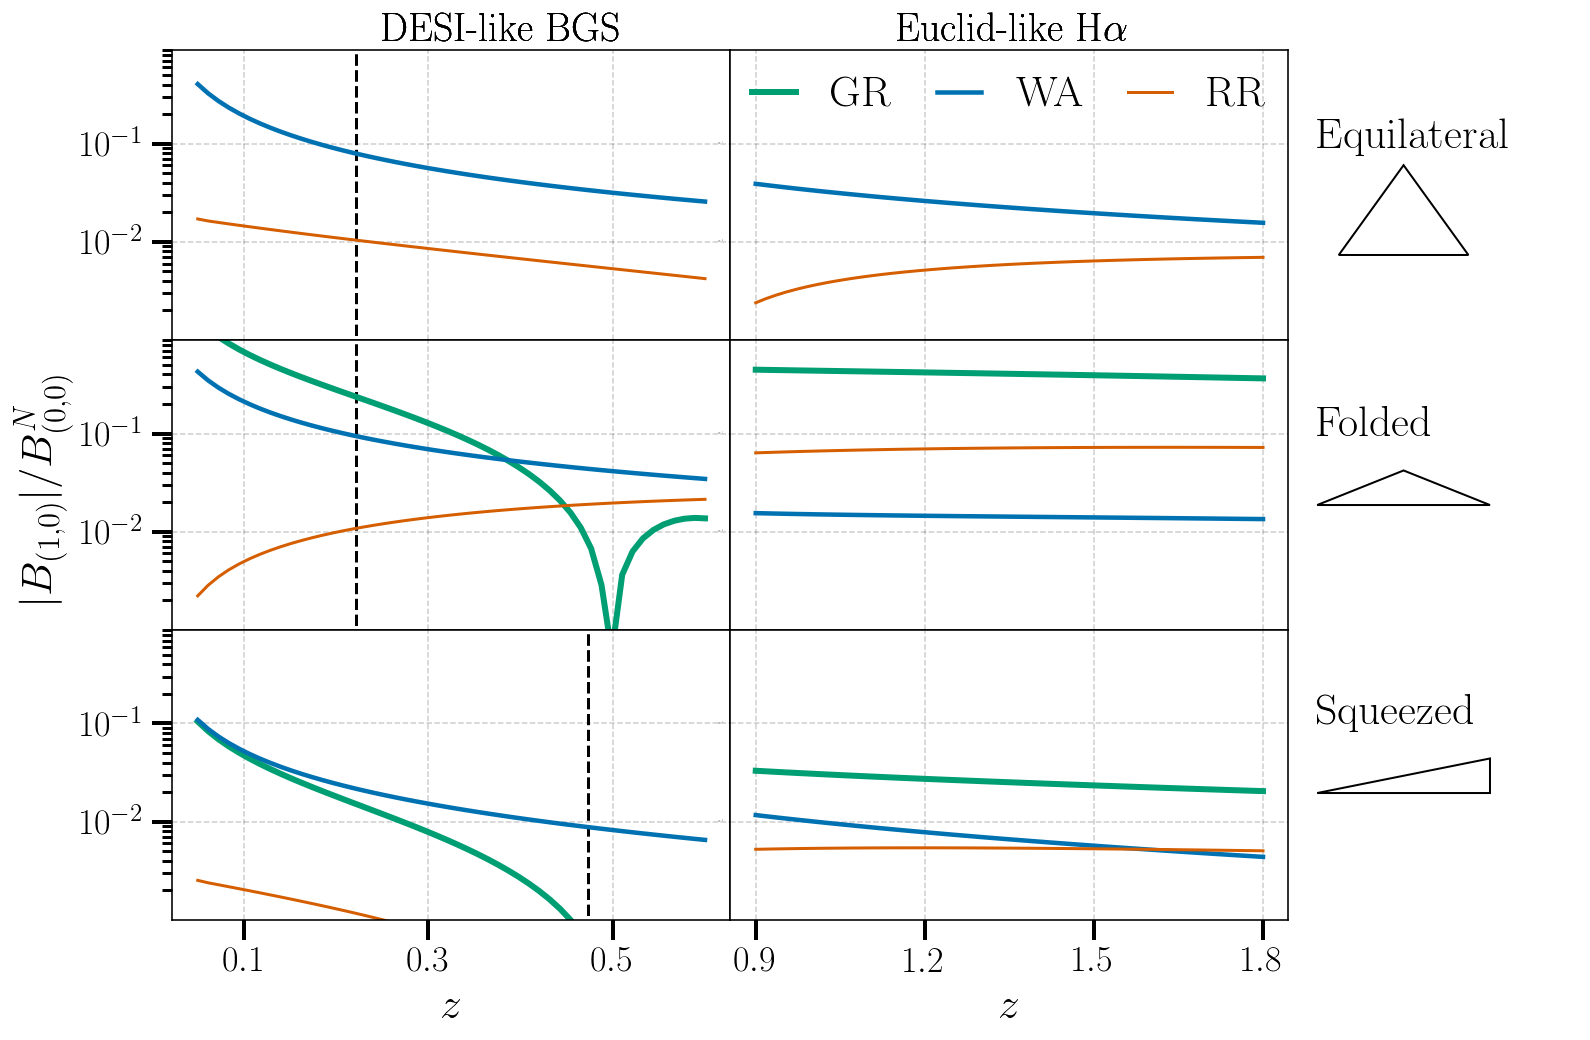

In [137]:
plot_3x2(True)

In [83]:
def flat_bool(arr,slice_=None):#make flat and impose condtion k1>k2>k3
    if slice_ == None:
        return np.abs(arr).flatten()[tri_bool.flatten()]
    else:
        return np.abs(arr[slice_].flatten()[tri_bool[slice_].flatten()])
#plots over all triangles     
def plot_all(ymin=1e+5,ymax=1e+10,ax=None):
    zz=1
    cosmo_functions = CosmologicalFunctions(cosmo,survey_params=Euclid_dict)
    derivs = cosmo_functions.get_derivs(zz)
    betas = cosmo_functions.get_beta_funcs(zz)

    # define bins centres
    bin_width = 0.005
    k_bin = np.arange(bin_width,0.07,bin_width)

    k1,k2,k3 = np.meshgrid(k_bin,k_bin,k_bin,indexing='ij')

    #get theta from triagle condition - this create warnings from non-closed triangles
    # Handle cases where floating-point errors might cause cos_theta to go slightly beyond [-1, 1]
    cos_theta = (k3**2 - k1**2 - k2**2)/(2*k1*k2)
    cos_theta = np.where(np.isclose(np.abs(cos_theta), 1), np.sign(cos_theta), cos_theta) #need to get rid of rounding errors

    #if we want to suprress warnings from invalid values we can reset cos(theta) these terms are ignored anyway
    cos_theta = np.where(np.logical_or(cos_theta < -1, cos_theta > 1), 0, cos_theta)
    theta = np.arccos(cos_theta)
    
    params = cosmo_functions.get_params(k1,k2,theta,zz)

    #create bool for closed traingles with k1>k2>k3...
    tri_bool = np.full_like(k1,False).astype(np.bool_)
    fake_k = np.zeros_like(k1)# also create fake k- to plot over as in we define k1 then allow space to fill for all triangles there
    mesh_index = np.zeros_like(k1)
    tri_num = 0
    for i in range(k1.shape[0]+1):
        if i == 0:
            continue
        for j in range(i+1):#enforce k1>k2
            if j == 0:
                continue
            for k in range(i-j,j+1):# enforce k2>k3 and triangle condition |k1-k2|<k3
                if k==0:
                    continue

                #for indexing
                ii = i-1
                jj = j-1
                kk = k-1
                
                #print(ii,jj,kk)
                tri_bool[ii,jj,kk] = True
                mesh_index[ii,jj,kk] = tri_num
                tri_num +=1
                fake_k[ii,ii,ii] = 1 
    
    if ax==None:
        fig, ax = plt.subplots(figsize=(12, 6))
        
    def flat_bool(arr):#make flat and impose condtion k1>k2>k3
        return np.abs(arr.flatten()[tri_bool.flatten()])

    for i in range(len(flat_bool(fake_k))):
        if flat_bool(fake_k)[i]>0:
            ax.vlines(i+1,-1e+10,1e+10,linestyles='--',color='grey',alpha=0.6)

    def thin_xticks(arr,split=7,frac=3):#there are too many xticks at the start
        return np.concatenate((arr[:split][::frac],arr[split:]))
    
    tri_index = np.arange(len(flat_bool(k1))) 
    index_ticks = tri_index[flat_bool(fake_k)>0]+1#+1 as get where k1 steps not the equalateral before...
    ticks = k_bin
    _ = plt.xticks(thin_xticks(index_ticks)[1:], [round(i, 3) for i in thin_xticks(ticks)[1:]])
    
    ax.set_yscale('log')
    ax.set_ylim(ymin,ymax)
    ax.set_xlim(0,tri_index[-1])
    ax.set_xlabel('$k_1$ [h/Mpc]')
    
    #np.array([flat_bool(k1/bin_width),flat_bool(k2/bin_width),flat_bool(k3/bin_width)]).astype(np.int_).T
    
    #plot where k2 steps..
    for i in range(mesh_index.shape[0]):
        for j in range(mesh_index.shape[0]):
            ax.vlines(mesh_index[i,j,j]+1,0,1e+10,linestyles='--',color='grey',alpha=0.2)
    
    if True:
        #so lets find and shade squeezed limit
        is_squeeze = np.zeros_like(mesh_index)
        for i in range(mesh_index.shape[0]):
            for j in range(i+1):
                for k in range(i-j-1,j+1):
                    if k < 0:
                        continue
                    if i+1 > 3*(k+1) and j+1 > 3*(k+1):
                        is_squeeze[i,j,k] = 1e+8

        ax.fill_between(flat_bool(mesh_index), 0,1e+10, where=flat_bool(is_squeeze), color='gray', alpha=0.2)

    return params,derivs,betas,mesh_index,tri_bool

In [16]:
def plot_slice(contribution,which_slice=(10,10,10)):
    """plot triangles at correct triangle number"""
    x_tmp = mesh_index[which_slice]
    x = x_tmp[x_tmp>0]# remove triangles we are not considering 
    y = flat_bool(contribution,(which_slice))
    return x,y

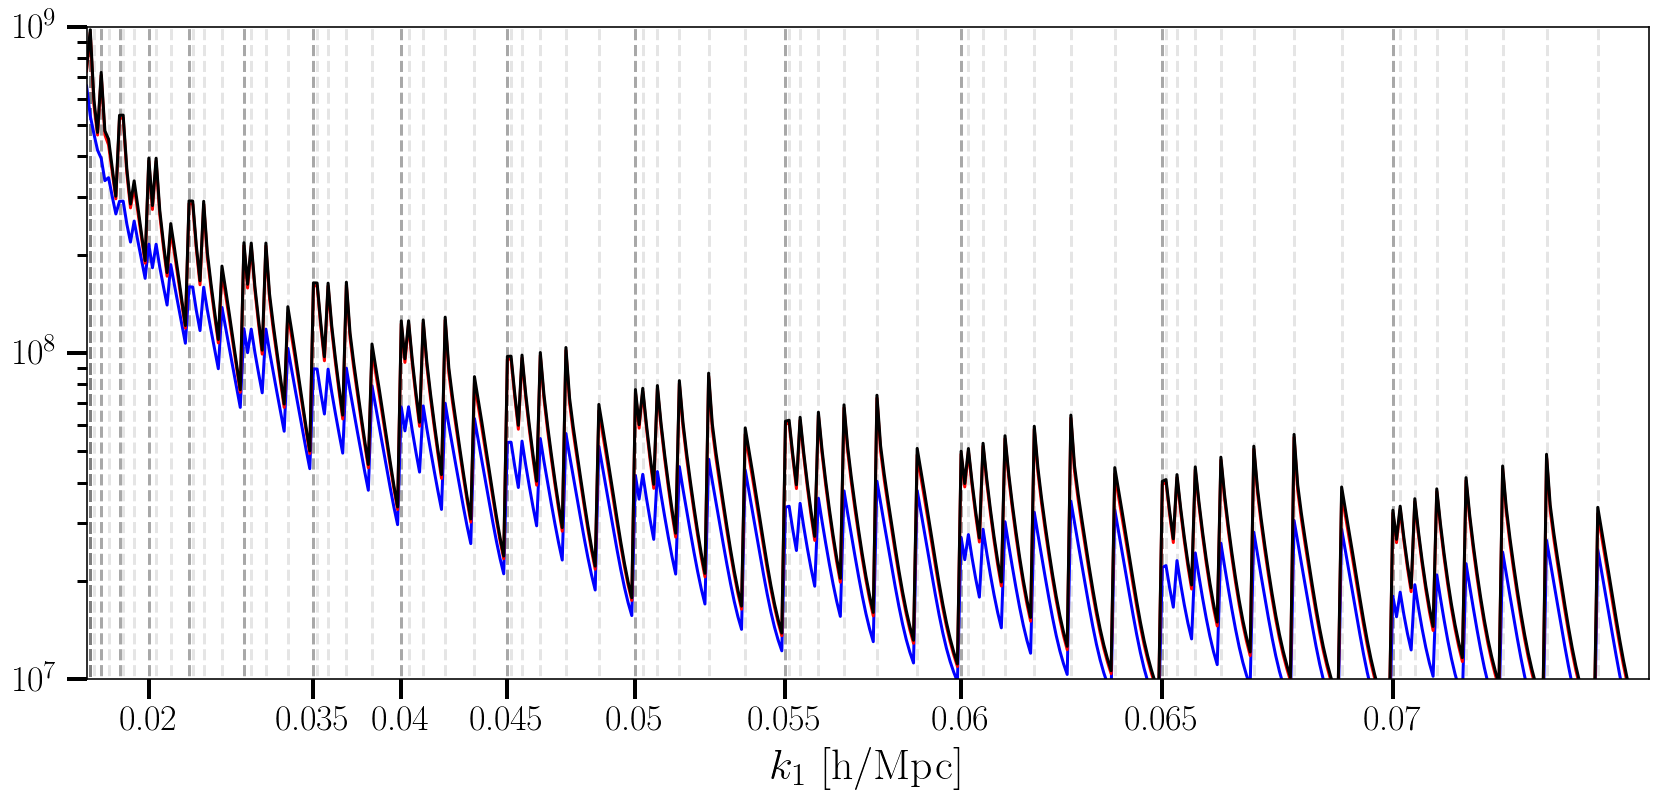

In [489]:
params,derivs,betas,mesh_index,tri_bool = plot_all(1e+7,1e+9)

V123 = 8*np.pi**2*params[0]*params[1]*params[2]*(2)**3 #from thin bin limit

#plt.plot(flat_bool(np.sqrt(COV.N11(params,1e+3,V123))),'-',label='GR',color='blue')
plt.plot(flat_bool(np.sqrt(COV.N11(params,1e+3,V123))),'-',label='GR',color='blue')
plt.plot(flat_bool(np.sqrt(COV.N30(params,1e+3,V123))),'-',label='GR',color='red')
plt.plot(flat_bool(np.sqrt(COV.N10(params,1e+3,V123))),'-',label='GR',color='black')



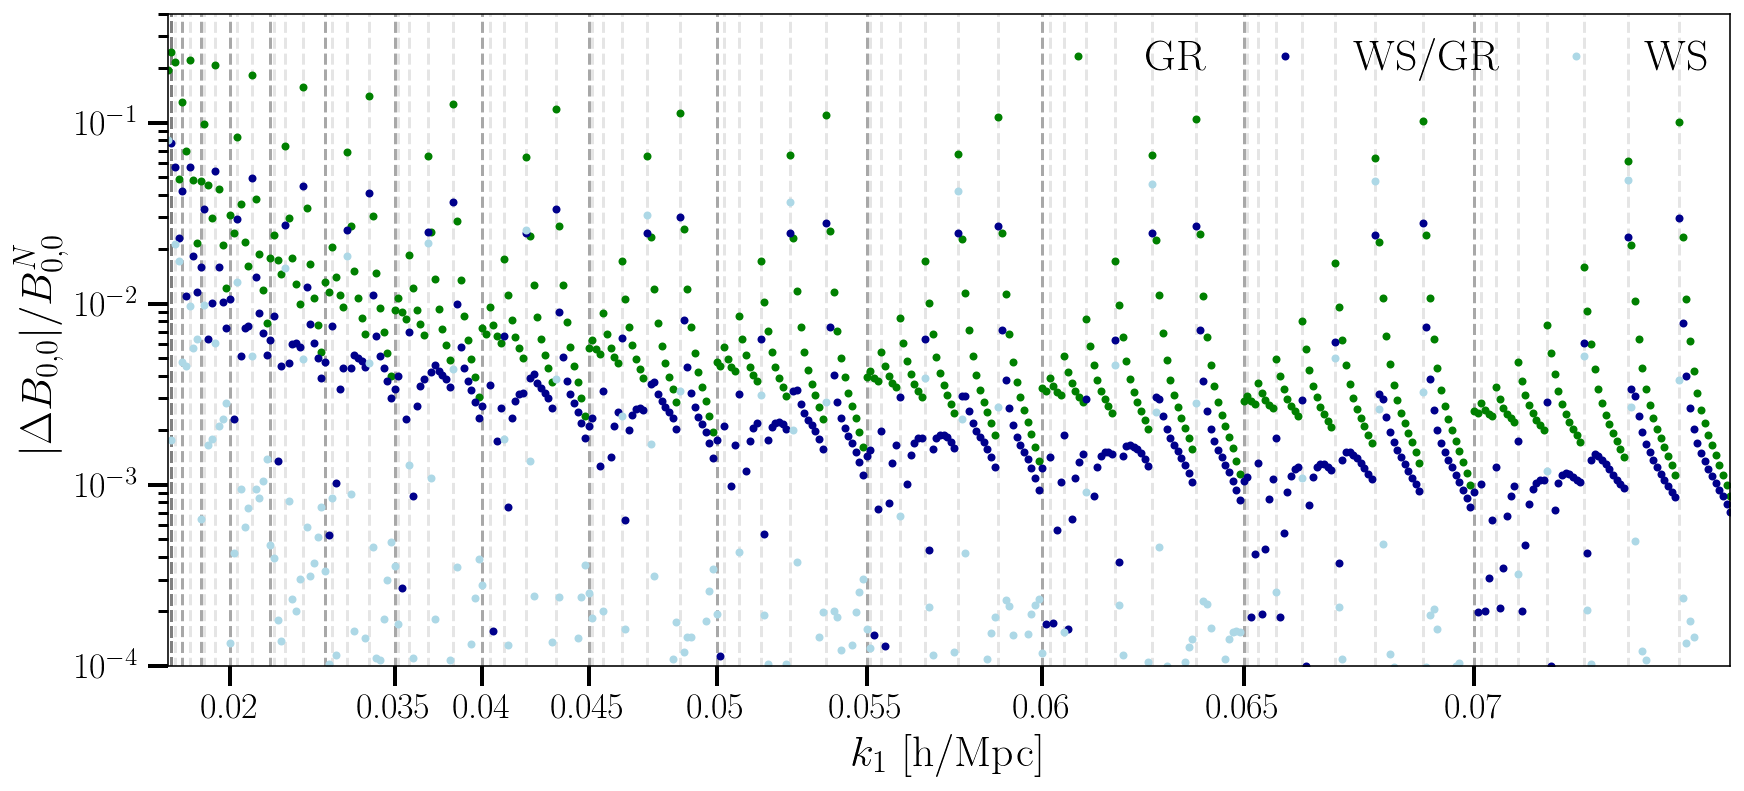

In [445]:
plt.figure(figsize=(14,6))
params,derivs,betas,mesh_index,tri_bool = plot_all(1e-4,4e-1)

#so plot actual stuff
x,y = plot_slice(GR0.l0(params).imag,(4,3,0))
#plt.plot(x,y,'o',label='N',color='black')

#plt.plot(flat_bool(is_squeeze),'o',label='N',color='black')

r=s=1/3;

plt.plot(flat_bool(GR2.l2(params,betas)/GR0.l2(params)),'.',label='GR',color='green')
plt.plot(flat_bool(WS_GR_mix.l2(params,derivs,betas,r,s)/GR0.l2(params)),'.',label='WS/GR',color='darkblue')
plt.plot(flat_bool(WS.l2(params,derivs,r,s)/GR0.l2(params)),'.',label='WS',color='lightblue')

#plt.ylabel(r'$|B_0| \, [\rm Mpc/h]^6$')
plt.ylabel(r'$|\Delta B_{0,0}|/B^N_{0,0}$')
plt.legend(ncol=3,frameon=False,title_fontsize=18,handlelength=1.5,columnspacing=1,handleheight=0.5, borderpad=0)

plt.savefig('plots/monopole_all.png', bbox_inches='tight', dpi=400)

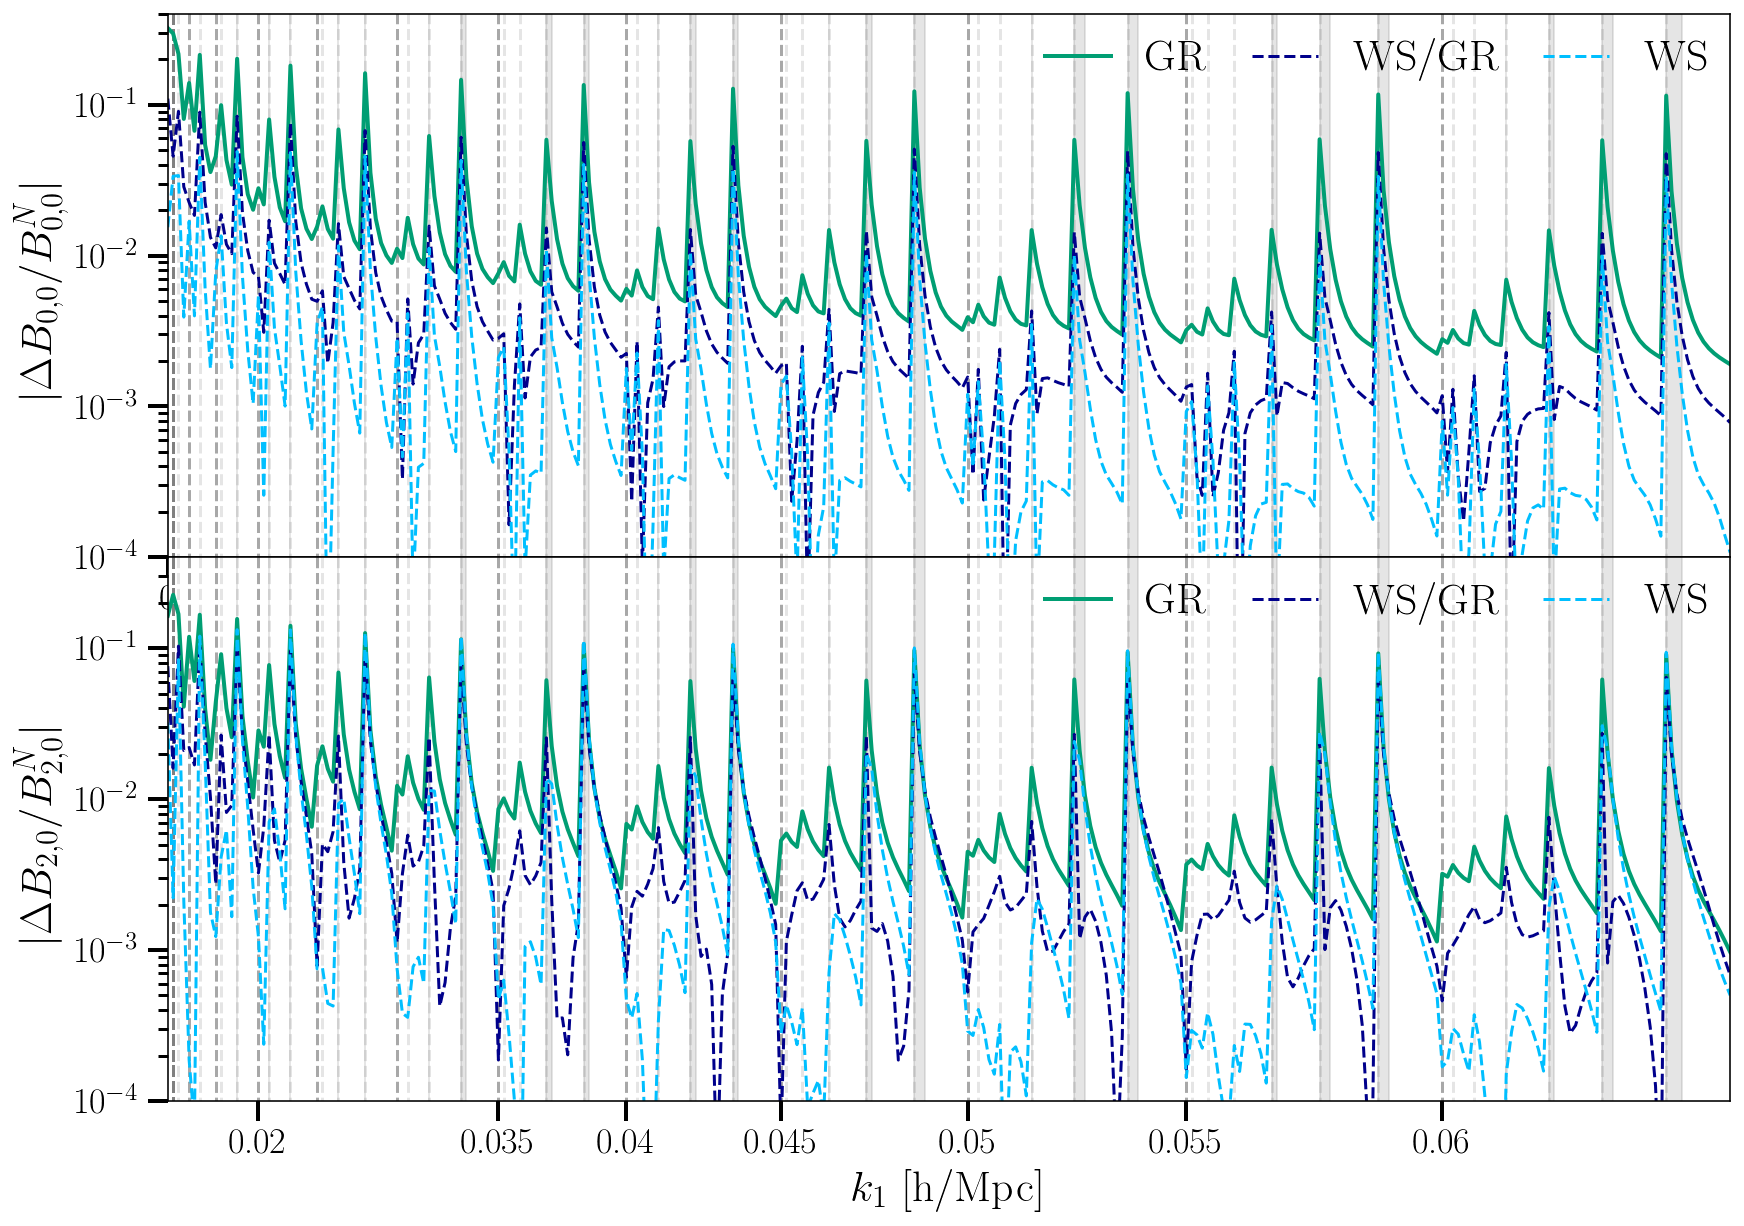

In [88]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
params,derivs,betas,mesh_index,tri_bool = plot_all(1e-4,4e-1,ax1)

r=s=0
ax1.plot(flat_bool(GR2.l0(params,betas)/GR0.l0(params)),'-',label='GR',color=colors[1],linewidth =2,alpha=1)
ax1.plot(flat_bool(WS_GR_mix.l0(params,derivs,betas,r,s)/GR0.l0(params)),'--',label='WS/GR',color='darkblue',alpha=1)
ax1.plot(flat_bool(WS.l0(params,derivs,r,s)/GR0.l0(params)),linestyle='--',label='WS',color='deepskyblue',alpha=1)


#plt.ylabel(r'$|B_0| \, [\rm Mpc/h]^6$')
ax1.set_ylabel(r'$|\Delta B_{0,0}/B^N_{0,0}|$')
ax1.legend(ncol=3,frameon=False,title_fontsize=18,handlelength=1.5,columnspacing=1,handleheight=0.5, borderpad=0)

params,derivs,betas,mesh_index,tri_bool = plot_all(1e-4,4e-1,ax2)
ax2.plot(flat_bool(GR2.l2(params,betas)/GR0.l2(params)),'-',label='GR',color=colors[1],linewidth =2,alpha=1)
ax2.plot(flat_bool(WS_GR_mix.l2(params,derivs,betas,r,s)/GR0.l2(params)),'--',label='WS/GR',color='darkblue',alpha=1)
ax2.plot(flat_bool(WS.l2(params,derivs,r,s)/GR0.l2(params)),linestyle='--',label='WS',color='deepskyblue',alpha=1)


#plt.ylabel(r'$|B_0| \, [\rm Mpc/h]^6$')
ax2.set_ylabel(r'$|\Delta B_{2,0}/B^N_{2,0}|$')
ax2.legend(ncol=3,frameon=False,title_fontsize=18,handlelength=1.5,columnspacing=1,handleheight=0.5, borderpad=0)


plt.subplots_adjust(hspace=0)

plt.savefig('plots/quadrupole_all.png', bbox_inches='tight', dpi=400)

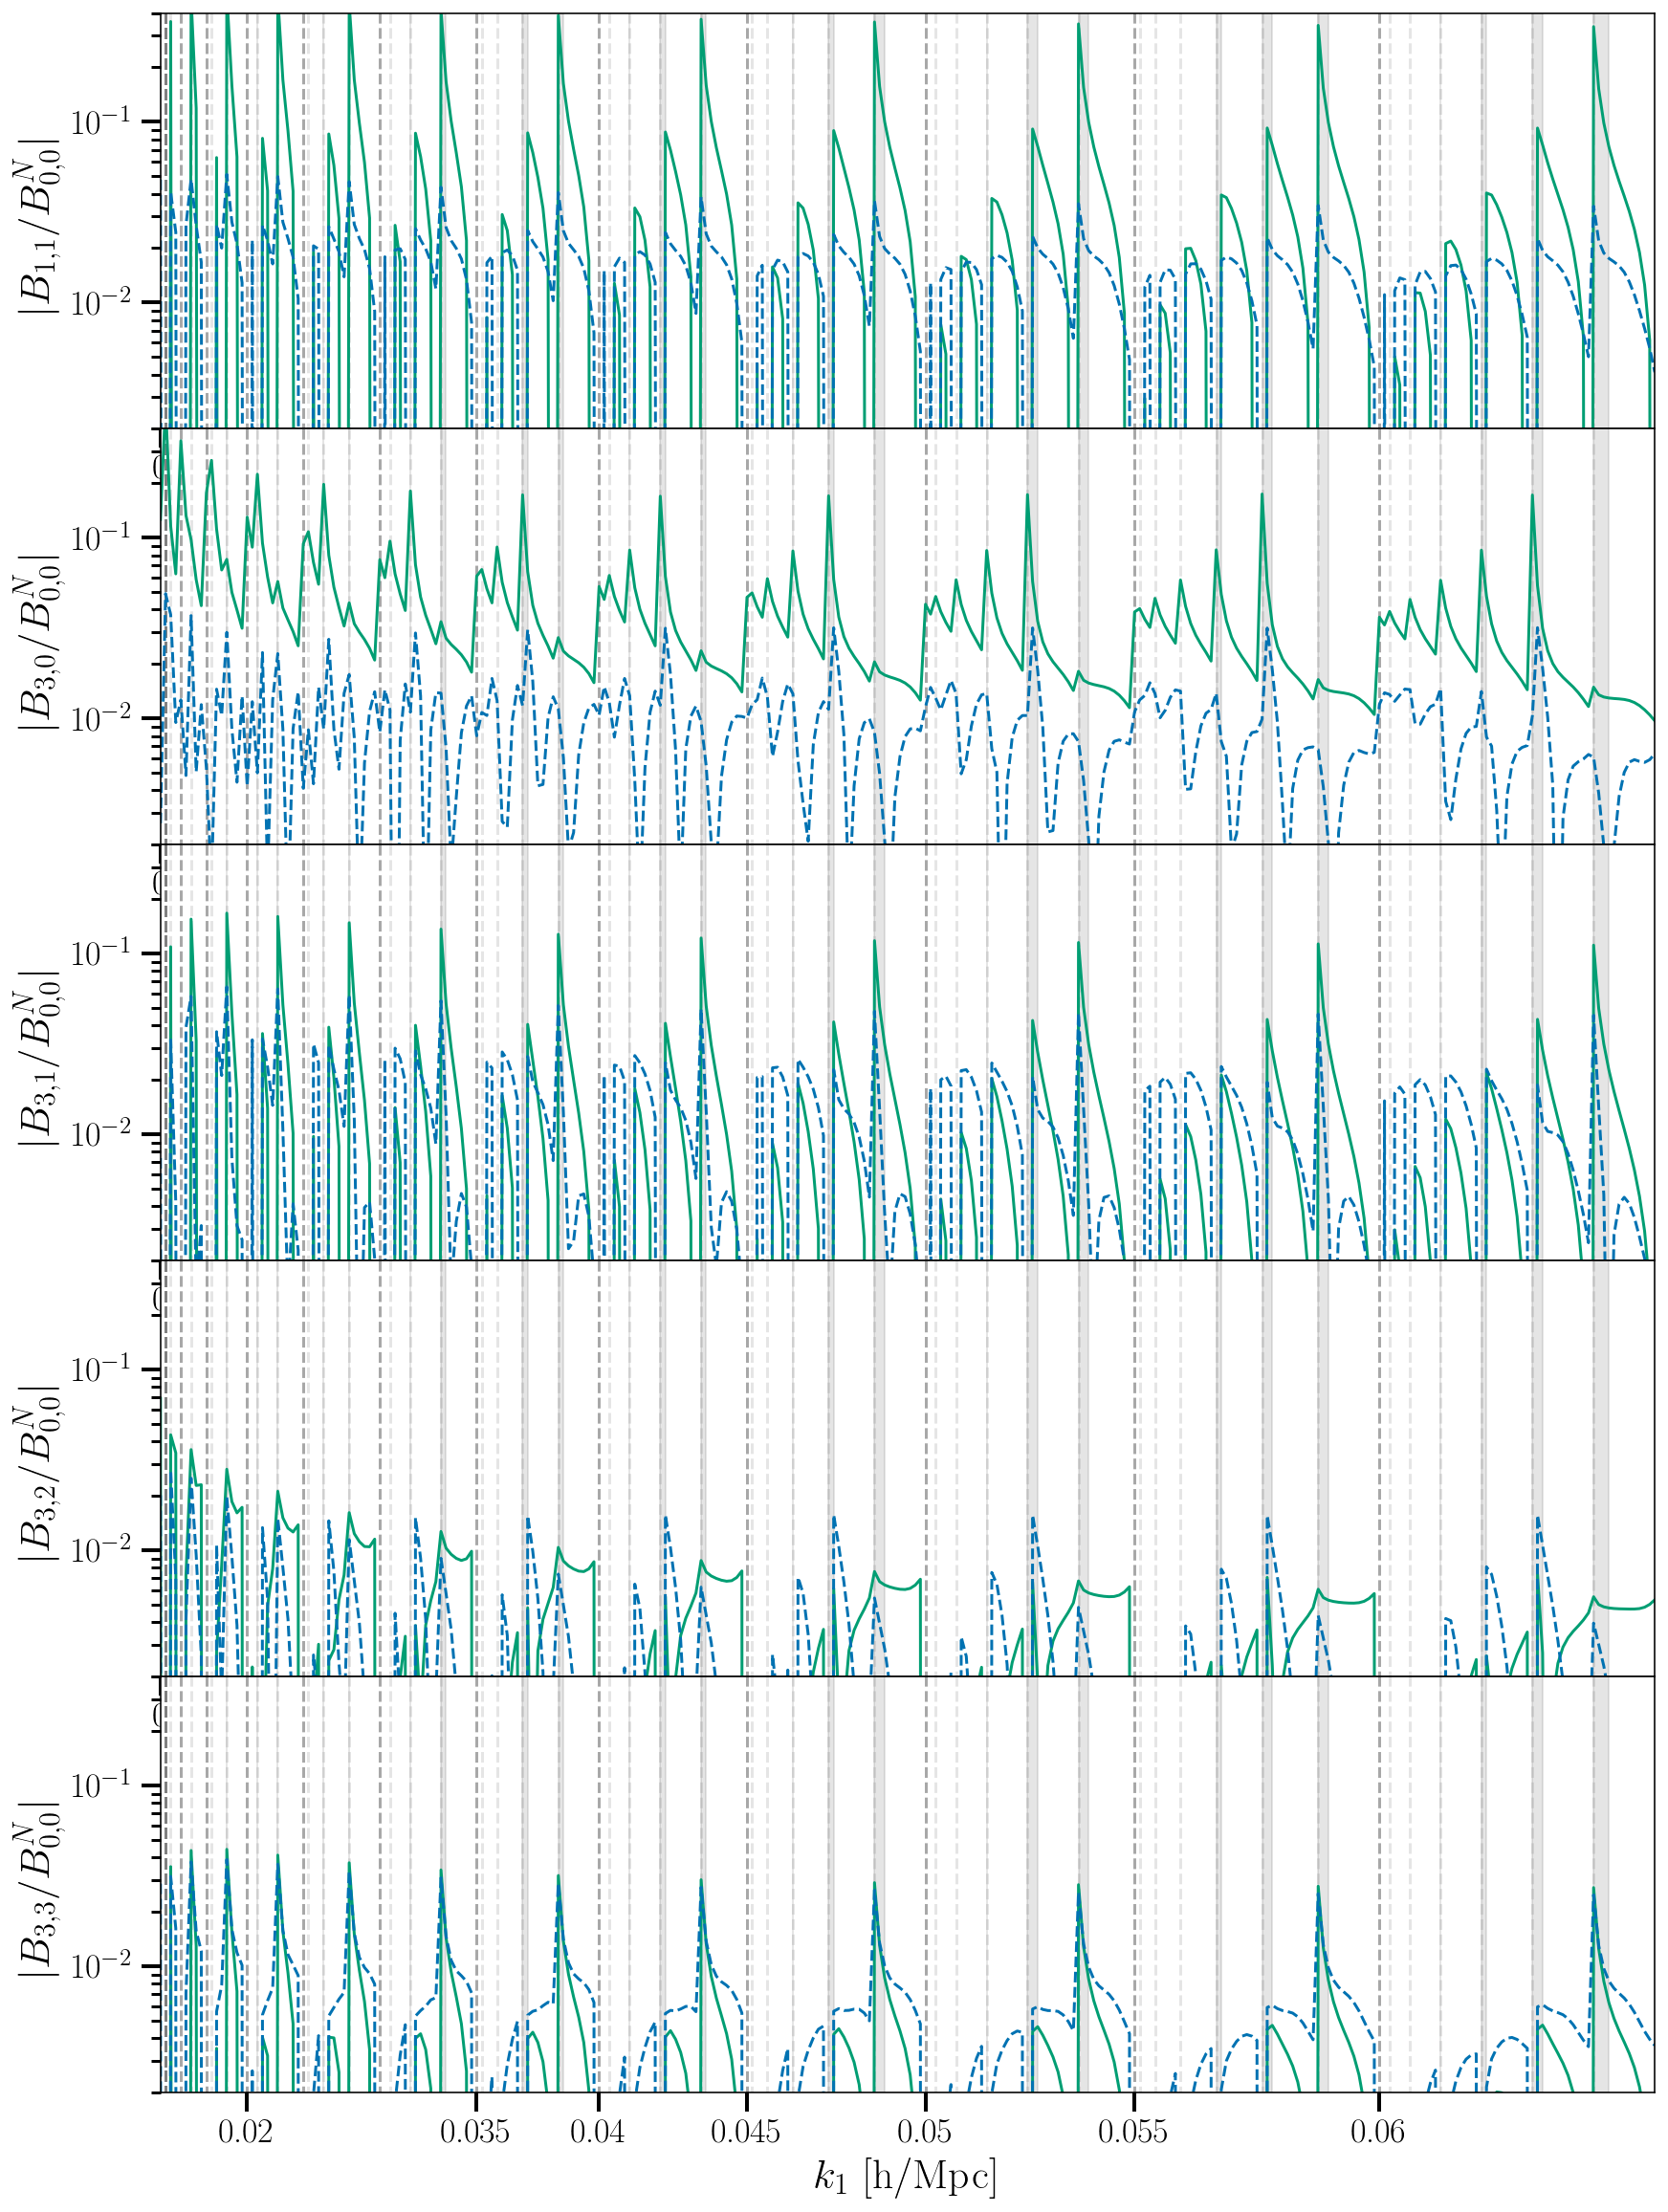

In [96]:
#for lots of plots baby
r=s=0
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(14, 20))
params,derivs,betas,mesh_index,tri_bool = plot_all(2e-3,4e-1,ax1)

ax1.plot(flat_bool(GR1.l1m1(params,betas)/GR0.l0(params)),'-',label='GR',color=colors[1],alpha=1)
ax1.plot(flat_bool((WA1.l1m1(params,r,s)+RR1.l1m1(params,derivs,r,s))/GR0.l0(params)),'--',label='WS',color=colors[0],alpha=1)

#plt.ylabel(r'$|B_0| \, [\rm Mpc/h]^6$')
ax1.set_ylabel(r'$| B_{1,1}/B^N_{0,0}|$')

params,derivs,betas,mesh_index,tri_bool = plot_all(2e-3,4e-1,ax2)

ax2.plot(flat_bool(GR1.l3(params,betas)/GR0.l0(params)),'-',label='GR',color=colors[1],alpha=1)
ax2.plot(flat_bool((WA1.l3(params,r,s)+RR1.l3(params,derivs,r,s))/GR0.l0(params)),'--',label='WS',color=colors[0],alpha=1)

#plt.ylabel(r'$|B_0| \, [\rm Mpc/h]^6$')
ax2.set_ylabel(r'$| B_{3,0}/B^N_{0,0}|$')

params,derivs,betas,mesh_index,tri_bool = plot_all(2e-3,4e-1,ax3)

ax3.plot(flat_bool(GR1.l3m1(params,betas)/GR0.l0(params)),'-',label='GR',color=colors[1],alpha=1)
ax3.plot(flat_bool((WA1.l3m1(params,r,s)+RR1.l3m1(params,derivs,r,s))/GR0.l0(params)),'--',label='WS',color=colors[0],alpha=1)

ax3.set_ylabel(r'$| B_{3,1}/B^N_{0,0}|$')
params,derivs,betas,mesh_index,tri_bool = plot_all(2e-3,4e-1,ax4)

ax4.plot(flat_bool(GR1.l3m2(params,betas)/GR0.l0(params)),'-',label='GR',color=colors[1],alpha=1)
ax4.plot(flat_bool((WA1.l3m2(params,r,s)+RR1.l3m2(params,derivs,r,s))/GR0.l0(params)),'--',label='WS',color=colors[0],alpha=1)

ax4.set_ylabel(r'$| B_{3,2}/B^N_{0,0}|$')
params,derivs,betas,mesh_index,tri_bool = plot_all(2e-3,4e-1,ax5)

ax5.plot(flat_bool(GR1.l3m3(params,betas)/GR0.l0(params)),'-',label='GR',color=colors[1],alpha=1)
ax5.plot(flat_bool((WA1.l3m3(params,r,s)+RR1.l3m3(params,derivs,r,s))/GR0.l0(params)),'--',label='WS',color=colors[0],alpha=1)

ax5.set_ylabel(r'$| B_{3,3}/B^N_{0,0}|$')
plt.subplots_adjust(hspace=0)

plt.savefig('plots/other_odd.png', bbox_inches='tight', dpi=400)

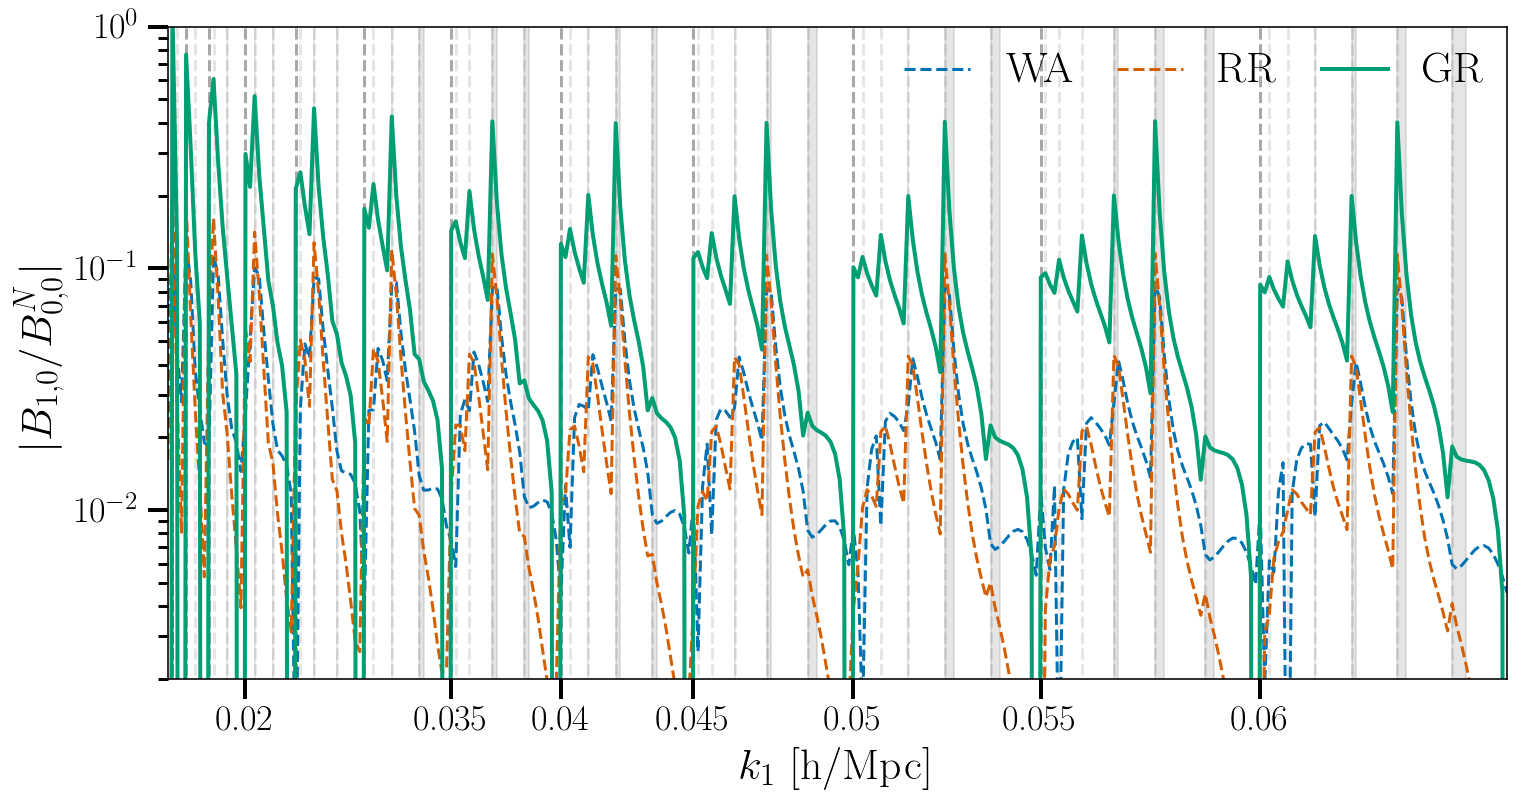

In [89]:
params,derivs,betas,all_k,tri_bool = plot_all(2e-3,1e+0)

#V123 = 8*np.pi**2*params[0]*params[1]*params[2]*(2)**3 #from thin bin limit

norm = GR0.l0(params)#(4*np.pi) *np.sqrt(COV.N10(params,1e+3,V123))#

r=0;s=0
#plt.plot(flat_bool((WA1.l1(params,r,s)+RR1.l1(params,derivs,r,s))/GR0.l0(params)),'-',label='WS',color='black')
plt.plot(flat_bool(WA1.l1(params,r,s)/norm),'--',label='WA',color=colors[0])
plt.plot(flat_bool(RR1.l1(params,derivs,r,s)/norm),'--',label='RR',color=colors[2])
plt.plot(flat_bool((GR1.l1(params,betas))/norm),'-',label='GR',color=colors[1],linewidth=2)
plt.legend(ncol=3,frameon=False,title_fontsize=18,handlelength=1.5,columnspacing=1,handleheight=0.5, borderpad=0)

plt.ylabel(r'$|B_{1,0}/B^N_{0,0}|$')
plt.savefig('plots/dipole_all_norm.png', bbox_inches='tight', dpi=400)

Text(0, 0.5, '$|B_{1,0}/B^N_{0,0}|$')

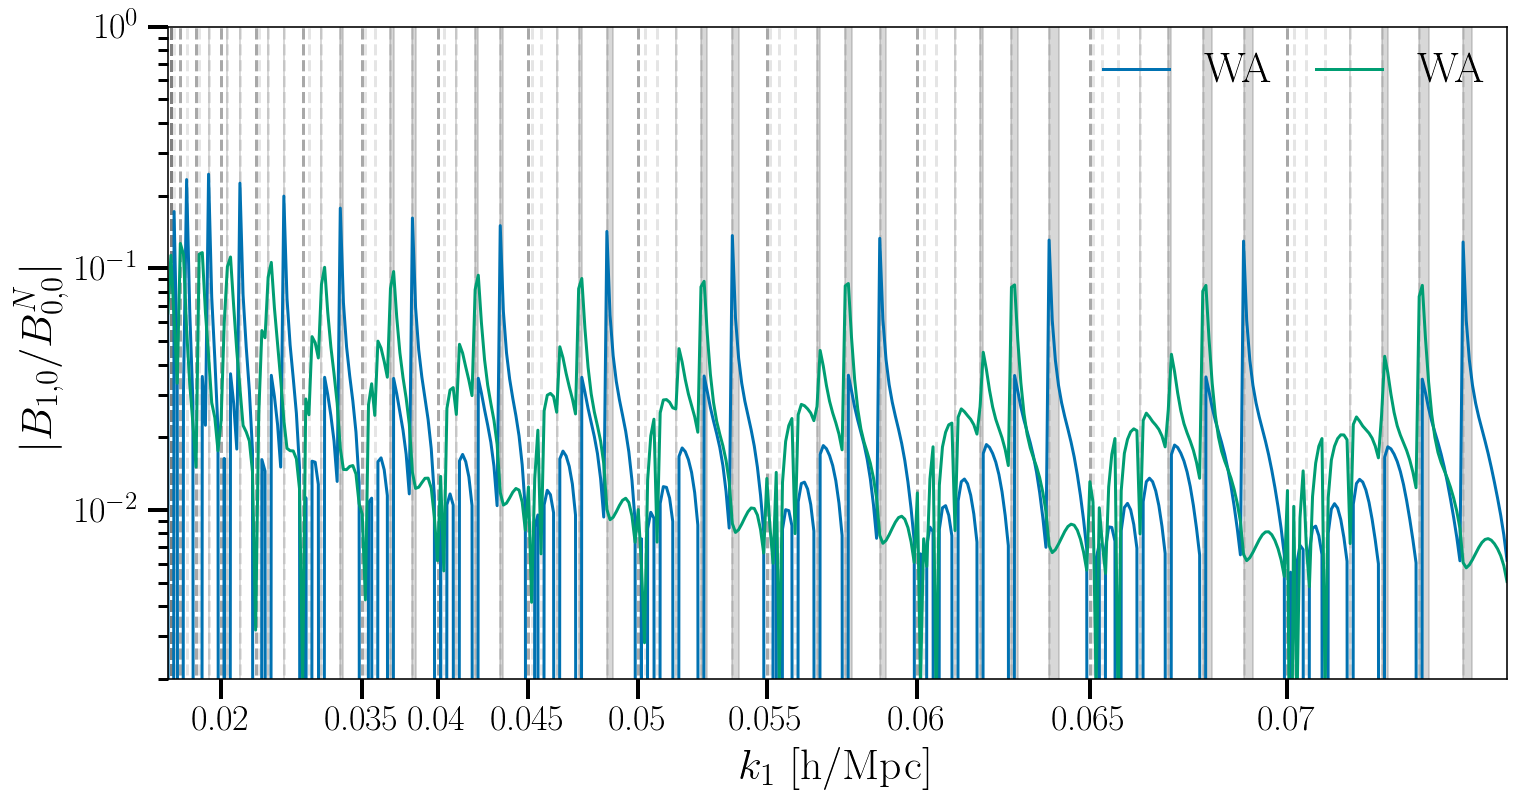

In [730]:
params,derivs,betas,all_k,tri_bool = plot_all(2e-3,1e+0)

norm = GR0.l0(params)#(4*np.pi) *np.sqrt(COV.N10(params,1e+3,V123))#

r=0;s=0
#plt.plot(flat_bool((WA1.l1(params,r,s)+RR1.l1(params,derivs,r,s))/GR0.l0(params)),'-',label='WS',color='black')
plt.plot(flat_bool(WA1.l1m1(params,r,s)/norm),'-',label='WA',color=colors[0])
plt.plot(flat_bool(WA1.l1(params,r,s)/norm),'-',label='WA',color=colors[1])

plt.legend(ncol=3,frameon=False,title_fontsize=18,handlelength=1.5,columnspacing=1,handleheight=0.5, borderpad=0)

plt.ylabel(r'$|B_{1,0}/B^N_{0,0}|$')
#plt.savefig('plots/dipole_all_norm.png', bbox_inches='tight', dpi=400)

## r s triangle plots

In [40]:
def plot_rs(bk,vmax=0.1,vmin=1): #plot triangle with mask!
    plt.figure(figsize=(14,6))
    # Create the colormap plot
    im = plt.imshow(np.abs(bk.T), extent=[0, 1, 0, 1], interpolation='bilinear', origin='lower', cmap='Spectral',norm=mpl.colors.LogNorm(np.abs(bk[np.abs(bk)>0]).min(), vmax=np.abs(bk).max()))#,vmin=0,vmax=vmax)#
    #im = plt.imshow((bk.T), extent=[0, 1, 0, 1], interpolation='bilinear', origin='lower', cmap='RdBu',vmin=-vmax,vmax=vmax)#
    
    cbar = plt.colorbar(im)#format='%.0e'
    cbar.set_label(r"$B_{\ell=1}(k_1=0.1,k_2,k_3)$")
    
    # Add labels and title
    plt.xlabel('$r$')
    plt.ylabel('$s$')

    #so masking 
    # Create a mask for the triangular region
    size = int(1e+3)
    r = np.linspace(0.0, 1, size,dtype=np.float32)
    s = np.linspace(0.0, 1,  size,dtype=np.float32)
    rr,ss = np.meshgrid(r,s)
    mask = np.where((rr + ss <= 1),np.nan,1)
    im = plt.imshow(mask, extent=[0, 1, 0.0, 1], interpolation='bilinear', origin='lower', cmap='binary')
    
    plt.grid(ls='--',lw=0.75,color='k',alpha=0.1)
    plt.plot(1/3,1/3,'x',markersize=10,color='black')
    x_bound = [0,1]
    y_bound = [1,0]#
    #plt.text(0.06,0.55,'$r=s=1/3$')
    plt.plot(x_bound,y_bound,'k',linewidth=3)
    # Show the plot
    plt.show()

In [128]:
def plot_rs_multi(bk,vmin,vmax): #plot triangle with mask!   
        
    fig = plt.figure(figsize=(12, 5))

    # Define gridspec with 1 rows and 3 columns
    gs = GridSpec(1, 3, width_ratios=[3, 3, 3])

    # Create subplots with custom aspect ratios
    axs = [fig.add_subplot(gs[0, i]) for i in range(3)]  # Subplots in the first row

    fig.subplots_adjust(wspace=0)
    # Create the colormap plot
    im0 = axs[0].imshow(np.abs((bk[0]).T),aspect=1, extent=[0, 1, 0, 1], interpolation='bilinear', origin='lower', cmap='Spectral',norm=mpl.colors.LogNorm(vmin, vmax=vmax))#,vmin=0,vmax=vmax)#
    im1 = axs[1].imshow(np.abs((bk[1]).T),aspect=1, extent=[0, 1, 0, 1], interpolation='bilinear', origin='lower', cmap='Spectral',norm=mpl.colors.LogNorm(vmin, vmax=vmax))#,vmin=0,vmax=vmax)#
    im2 = axs[2].imshow(np.abs((bk[2]).T),aspect=1, extent=[0, 1, 0, 1], interpolation='bilinear', origin='lower', cmap='Spectral',norm=mpl.colors.LogNorm(vmin, vmax=vmax))#,vmin=0,vmax=vmax)#

    #im0 = axs[0].imshow(((bk[0]).T),aspect=1, extent=[0, 1, 0, 1], interpolation='bilinear', origin='lower', cmap='RdBu',vmin=-vmax,vmax=vmax)#,vmin=0,vmax=vmax)#
    #im1 = axs[1].imshow(((bk[1]).T),aspect=1, extent=[0, 1, 0, 1], interpolation='bilinear', origin='lower', cmap='RdBu',vmin=-vmax,vmax=vmax)#,vmin=0,vmax=vmax)#
    #im2 = axs[2].imshow(((bk[2]).T),aspect=1, extent=[0, 1, 0, 1], interpolation='bilinear', origin='lower', cmap='RdBu',vmin=-vmax,vmax=vmax)#,vmin=0,vmax=vmax)#
    
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.81, 0.25, 0.02, 0.5])
    cbar = fig.colorbar(im2, cax=cbar_ax)#,ticks=[0.01, 0.1, 1]
    #cbar.set_label(r"$ |B^{\rm wa}_{\ell=1}(k_1=0.05)|/B^{\rm pp}_{\ell=0}$")#"$ |B_{\ell=1}(k_1=0.05)|/B_0 $"
    cbar.set_label(r"$ |B^{\rm WA/GR}_{(0,0)}|/B^{\rm N}_{(0,0)}$")#"$ |B_{\ell=1}(k_1=0.05)|/B_0 $"
    
    x_bound = [0,1]
    y_bound = [1,0]
    
    def triple_triangle_coords(base_x=0.4,base_y=0.5):
        triangle_coords = {
            0: np.array([[base_x+0.05, base_y +0.1-0.3*np.sin(np.pi/3)], [base_x+0.2, base_y+0.1], [base_x+0.35, base_y +0.1-0.3*np.sin(np.pi/3)]]),  # Equilateral triangle
            1: np.array([[base_x, base_y-0.05], [base_x+0.2, base_y+0.05], [base_x+0.4, base_y-0.05]]),  # Folded triangle
            2: np.array([[base_x, base_y-0.05], [base_x+0.4, base_y+0.05], [base_x+0.4, base_y-0.05]])   # Squeezed triangle
        }
        return triangle_coords
    
    triangle_labels = {0: 'Equilateral', 1: 'Folded', 2: 'Squeezed'}
    
    base_x,base_y = 0.55,0.85
    # Plot the triangles on the additional axis
    for i in range(3):
        triangle = Polygon(triple_triangle_coords(base_x,base_y)[i], closed=True, fill=None, edgecolor='black')
        axs[i].add_patch(triangle)
        #axs[i].text(base_x-0.1, base_y+0.15, triangle_labels[i])
       
    
    axs[0].set_ylabel('$s$')
    for i in range(3):
        
        axs[i].plot(x_bound,y_bound,'k',linewidth=3)
        #axs[i].text(0.08,0.55,r'$\boldsymbol{d}=\boldsymbol{x}_%d$'%(i+1),fontsize=20)
        axs[i].set_xlabel('$r$')
        axs[i].set_xticks(np.arange(0.2, 0.8, 0.2))
        axs[i].plot(1/3,1/3,'x',markersize=10,color='black')
        #axs[i].set_box_aspect(aspect=0.8)
        #axs[i].set_xlim(0,1)
        #axs[i].set_ylim(0.5,1)
        #axs[i].grid(ls='--',lw=0.75,color='k',alpha=0.1)
        
        if i!=0:
            axs[i].yaxis.set_major_locator(plt.NullLocator())
            
    axs[0].set_yticks(np.arange(0, 1.01, 0.2))
    # Show the plot
    plt.savefig('plots/rs_tri.png', bbox_inches='tight', dpi=400)
    plt.show()

In [44]:
bk_rs_WA2 = np.zeros((3,500,500))
bk_rs_RR2 = np.zeros((3,500,500))
bk_rs_RRGR = np.zeros((3,500,500))
bk_rs_WAGR = np.zeros((3,500,500))
#bk_rs_WARR = np.zeros((3,500,500))
bk_mono = np.zeros(3)

In [48]:
def get_args1(func,params,derivs,betas):
    """
    get appropiate args for each function type
    """
    func_id = func.__name__ # get string name of func

    args = [params]
    if 'RR' in func_id:
        args.append(derivs)
    if 'GR' in func_id:
        args.append(betas)
    return args

In [123]:
#lets plot as a function of r and s
def rs_plot(func,r, s, zz,l=0):
    """Get array of"""

    rr,ss = np.meshgrid(r,s,indexing='ij')
    funcl = getattr(func,"l"+str(l)) 
    
    bk_tmp = np.zeros((3,500,500),dtype=np.complex64)
    
    for type_tri in tqdm(range(3)):
        #set triangle
        if type_tri ==0: #equilateral
            k1 = 0.01
            k2 = k3 = k1
            theta = np.arccos((k3**2 - k1**2 - k2**2)/(2*k1*k2))
        elif type_tri==1: # folded
            k1 = 0.02
            k3 = k2 = k1/2
            theta = np.arccos((k3**2 - k1**2 - k2**2)/(2*k1*k2))
        else: #squeezed
            k1 = k2 = 0.05
            k3 = 0.005
            theta = np.arccos((k3**2 - k1**2 - k2**2)/(2*k1*k2))

        cosmo_functions = CosmologicalFunctions(cosmo,survey_params=Euclid_dict)
        derivs = cosmo_functions.get_derivs(zz)
        betas = cosmo_functions.get_beta_funcs(zz)
        params = cosmo_functions.get_params(k1,k2,theta,zz)
        
        if func.__name__ == 'GR0':
            bk_tmp[type_tri] = funcl(params)
            continue

        args = get_args1(func,params,derivs,betas)

        bk_tmp[type_tri] = funcl(*args,rr,ss)
        which_rs = (rr + ss <= 1)#restrict to r+s \leq 1
        bk_tmp[type_tri] = np.where(which_rs,bk_tmp[type_tri],0)
        
    return bk_tmp

r = np.linspace(0, 1, 500)
s = np.linspace(0, 1, 500)

zz = 1
l = 2
bk_rs_WA2l2 = rs_plot(WA2 ,r, s, zz, l)


  0%|          | 0/3 [00:00<?, ?it/s]

In [76]:
bk_rs_WARR.shape

(3, 500, 500)

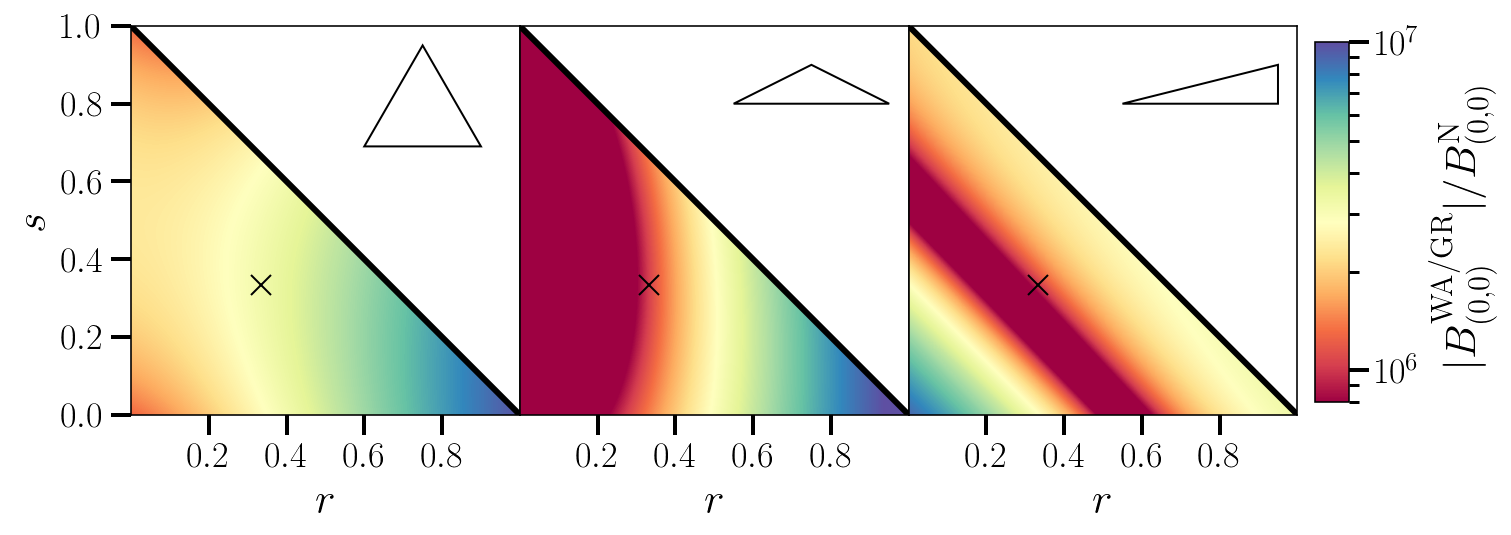

In [129]:
#plot_rs_multi(bk_rs_WA2+bk_rs_RR2+bk_rs_WARR,3.2e+6,3.8e+6)
plot_rs_multi(bk_rs_WA2l2,8e+5,1e+7)
#plot_rs_multi(bk_rs_WA2,8e+5,2e+7)

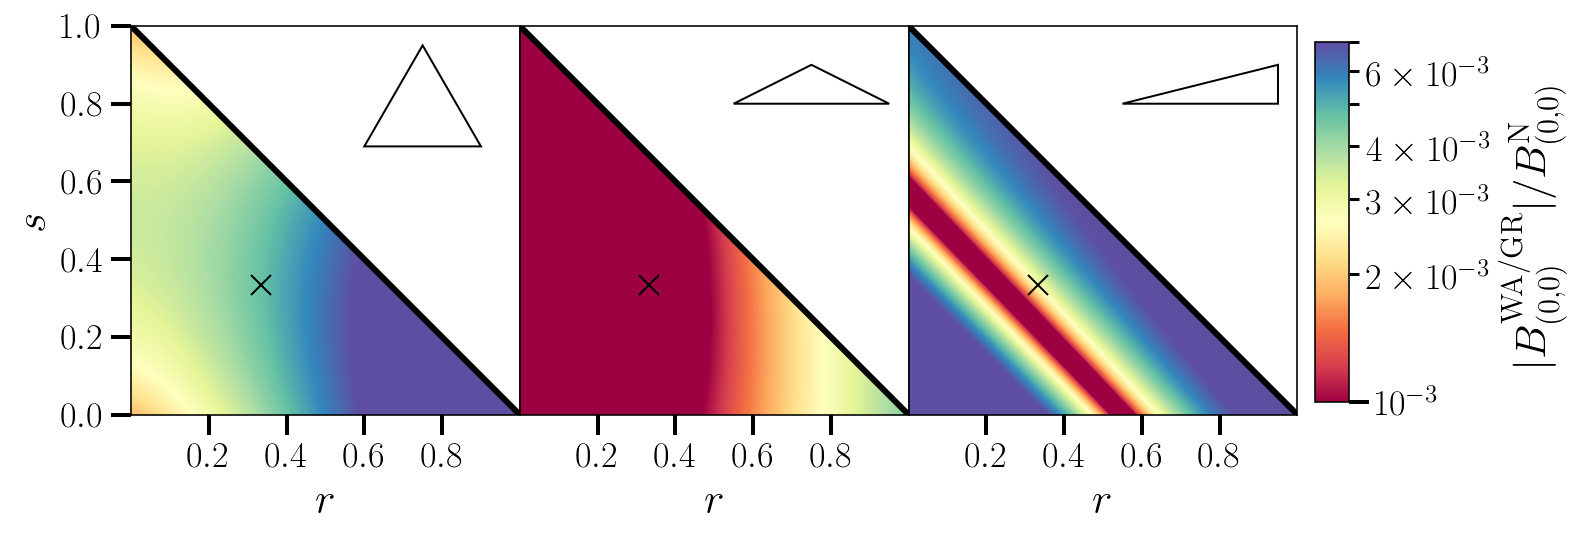

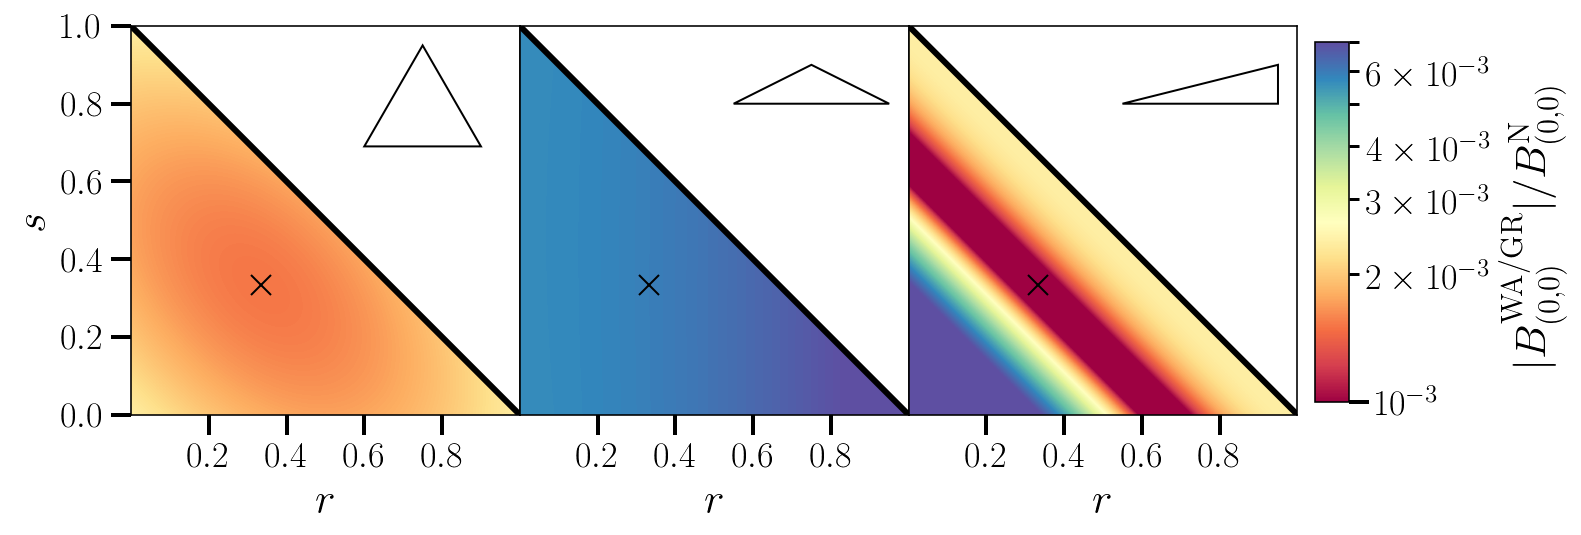

In [133]:
#plot_rs_multi((bk_rs_WA2+bk_rs_RR2+bk_rs_WARR)/bk_mono,2e-3,1e-2)
#plot_rs_multi(bk_rs_RR2/bk_mono,6e-4,7e-3)
plot_rs_multi(bk_rs_WA2l2/bk_mono,1e-3,7e-3)
plot_rs_multi(bk_rs_WA2/bk_mono,1e-3,7e-3)

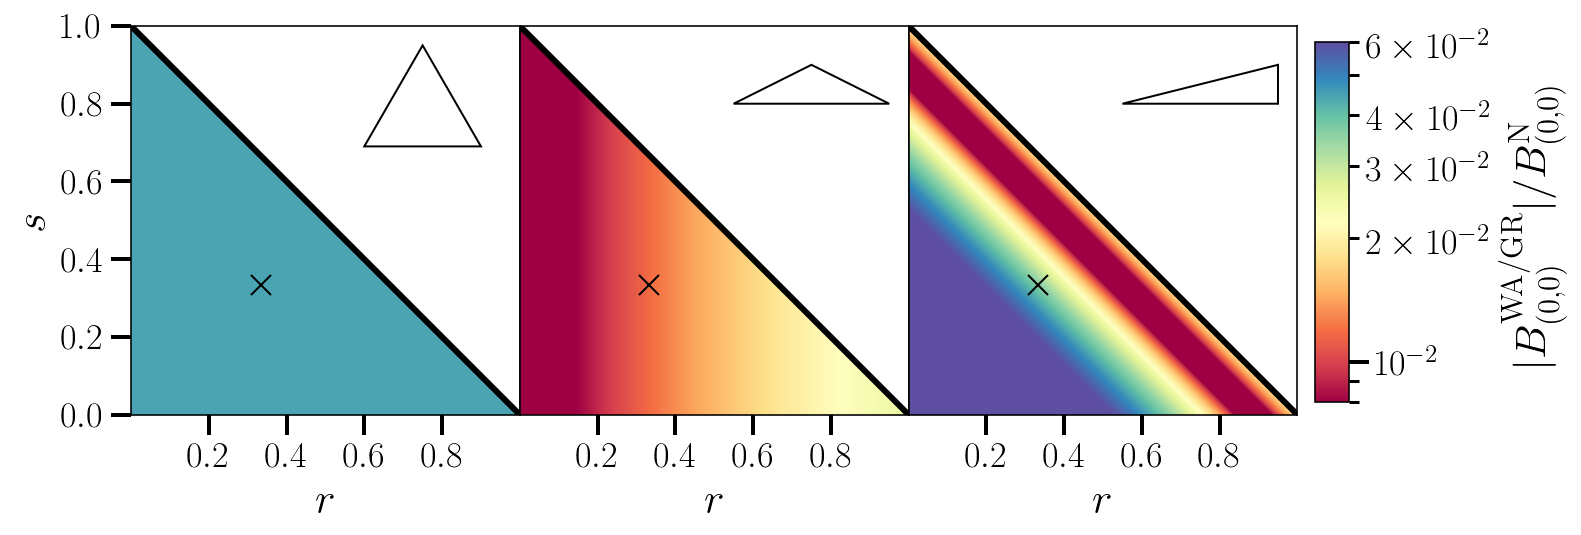

In [122]:
#plot_rs_multi(bk_rs_WAGR,1e+6,1e+8)#this is interesting
plot_rs_multi(bk_rs_WAGR/bk_mono,8e-3,6e-2)
#plot_rs_multi(bk_rs_RR2,5e+5,5e+6)

## triangle shape plots

In [102]:
#bk_0 = {}
#bk_1 = {}
#bk_2 = {}
bk_wa ={}#for x1,x2,x3 plot

In [138]:
from tqdm import tqdm
import warnings
#warnings.filterwarnings("ignore", message="invalid value encountered in divide")
#warnings.filterwarnings("ignore", message="invalid value encountered in arccos")

# Define the function
#@jit
def triangle_plot(x, y, zz,r=0,s=0):
    """Get array of"""
    bk_temp = np.zeros((len(x),len(y)))
    
    cosmo_functions = CosmologicalFunctions(cosmo,survey_params=Euclid_dict)
    derivs = cosmo_functions.get_derivs(zz)
    betas = cosmo_functions.get_beta_funcs(zz)

    xx,yy = np.meshgrid(x,y,indexing='ij')#create meshgrid where xx= k3/k1, yy= k2/k1
    
    #array version:
    k1 = 0.05 
    k3 = xx*k1
    k2 = yy*k1
    #get theta from triagle condition - this create warnings from non-closed triangles
    # Handle cases where floating-point errors might cause cos_theta to go slightly beyond [-1, 1]
    cos_theta = (k3**2 - k1**2 - k2**2)/(2*k1*k2)
    cos_theta = np.where(np.isclose(np.abs(cos_theta), 1), np.sign(cos_theta), cos_theta) #need to get rid of rounding errors
    
    #if we want to suprress warnings from invalid values we can reset cos(theta) these terms are ignored anyway
    cos_theta = np.where(np.logical_or(cos_theta < -1, cos_theta > 1), 0, cos_theta)
    theta = np.arccos(cos_theta)
    
    params = cosmo_functions.get_params(k1,k2,theta,zz)
    
    #bk_temp = RR1.l1(params,derivs, r, s).imag
    bk_temp = WA1.l1(params, r, s).imag
    #bk_temp = GR1.l1(params,betas).imag
    #bk_temp = GR0.l0(params).real
    
    #bk_temp = WA2.l0(params, r, s).real
    #bk_temp = WARR.l0(params,derivs, r, s).real
    #bk_temp = WAGR.l0(params,betas, r, s).real
    #bk_temp = RR2.l0(params,derivs, r, s).real
    #bk_temp = RRGR.l0(params,derivs,betas, r, s).real
    #bk_temp = GR2.l0(params,betas).real
    if False:
        PNGparams = cosmo_functions.get_PNGparams(1,zz,k1,k2_,k3)
        bk[i][which_k2] = PNG.l0(params,PNGparams).real
        
    which_k2 = np.logical_and((yy > 1 - xx), (yy>xx))#restrict to closed triangles
    
    print("done")
    return np.where(which_k2,bk_temp,0)#bk_temp#

xx = np.linspace(0.01, 1, 500)
yy = np.linspace(0.495, 1, 500)

zz=1.0
if False:
    r=0;s=0
    key = "z=%.2f, r=%d, s=%d"% (zz, r, s)#so lets get key 
    bk_wa[key] = triangle_plot(xx,yy,zz,r,s)
    r=1;s=0
    key = "z=%.2f, r=%d, s=%d"% (zz, r, s)
    bk_wa[key] = triangle_plot(xx,yy,zz,r,s)
    r=0;s=1
    key = "z=%.2f, r=%d, s=%d"% (zz, r, s)
    bk_wa[key] = triangle_plot(xx,yy,zz,r,s)

else:
    r=0;s=0
    mono_key = "z=%.2f"% (zz)
    #bk_0[mono_key] = triangle_plot(xx,yy,zz,r,s)
    key = mono_key + "_WA"
    bk_1[key] = triangle_plot(xx,yy,zz,r,s)
    #k2_mesh = triangle_plot(xx,yy,zz,r,s)
    #bk_png[mono_key] = triangle_plot(xx,yy,zz,r,s)

In [62]:
print(bk_1.keys())

In [165]:
def plot_triangle(bk,vmax=1,vmin=1): #plot triangle with mask!
    plt.figure(figsize=(12,4))
    # Create the colormap plot
    im = plt.imshow(np.abs(bk.T), extent=[0, 1, 0.5, 1], interpolation='bilinear', origin='lower', cmap='Spectral',norm=mpl.colors.LogNorm(1e-2*np.max(np.abs(bk)[np.abs(bk)>0]), vmax=np.max(np.abs(bk))))#,vmin=0,vmax=vmax)#
    #im = plt.imshow((bk.T), extent=[0, 1, 0.5, 1], interpolation='bilinear', origin='lower', cmap='RdBu',vmin=-vmax,vmax=vmax)#
    
    cbar = plt.colorbar(im)#format='%.0e'
    cbar.set_label(r"$B_{\ell=1}(k_1=0.1,k_2,k_3)$")#P_{HI}(k1=0.05, \mu_1)P_{HI}(k2, \mu_2)P_{HI}(k3, \mu_3)B_{\text{Gravitational}(k1=0.05)}

    # Add labels and title
    plt.xlabel('$k_3/k_1$')
    plt.ylabel('$k_2/k_1$')

    #so masking 
    # Create a mask for the triangular region
    size = int(1e+3)
    x = np.linspace(0.0, 1, size,dtype=np.float32)
    y = np.linspace(0.5, 1,  size,dtype=np.float32)
    xx,yy = np.meshgrid(x,y)
    mask = np.where(np.logical_and((yy > 1 - xx), (yy>xx)),np.nan,1)
    #im = plt.imshow(mask, extent=[0, 1, 0.5, 1], interpolation='bilinear', origin='lower', cmap='binary')
    
    plt.grid(ls='--',lw=0.75,color='k',alpha=0.1)
    
    x_bound = [0,0.4965,1]
    y_bound = [1,0.50,1]#
    #plt.text(0.06,0.55,'$r=s=1/3$')
    plt.plot(x_bound,y_bound,'k',linewidth=3)
    plt.show()

In [169]:
#plot_triangle(bk_0['z=1.00'],1e+10,1e+8)
plot_triangle(k2_mesh*k3_mesh*bk_1['z=1.00_WA'],1e+5,1e+3)
plot_triangle(k2_mesh*k3_mesh*bk_1['z=1.00_RR'],1e+5,1e+3)
plot_triangle(k2_mesh*k3_mesh*bk_1['z=1.00_GR'],1e+6,1e+5)
plot_triangle(k2_mesh*k3_mesh,1e+6,1e+5)


#plot_triangle(bk_wa['z=1.00, r=0, s=0']/bk_0['z=1.00'],0.1,1e-3)#d = x1
#plot_triangle(bk_wa['z=1.00, r=1, s=0']/bk_0['z=1.00'],0.1,1e-3)
#plot_triangle(bk_wa['z=1.00, r=0, s=1']/bk_0['z=1.00'],0.1,1e-3)
#plot_triangle(bk_rr1['z=1.00, r=0, s=0']/bk_0['z=1.00'],1,1e-3)
#plot_triangle((bk_png['z=1.00']-bk_0['z=1.00'])/bk_0['z=1.00'],1e-2,5e-4)

In [75]:
def plot_triangle_multi(bk0,bk1,bk2,vmax,vmin=5e-3): #plot triangle with mask!   
        
    fig = plt.figure(figsize=(12, 5))

    # Define gridspec with 1 rows and 3 columns
    gs = GridSpec(1, 3)

    # Create subplots with custom aspect ratios
    axs = [fig.add_subplot(gs[0, i]) for i in range(3)]  # Subplots in the first row

    #fig, axs = plt.subplots(1, 3,figsize=(14,5),sharey=True)
    fig.subplots_adjust(wspace=0)
    # Create the colormap plot
    im0 = axs[0].imshow(np.abs((bk0).T),aspect=1.5, extent=[0, 1, 0.5, 1], interpolation='bilinear', origin='lower', cmap='Spectral',norm=mpl.colors.LogNorm(vmin, vmax=vmax))#,vmin=0,vmax=vmax)#
    im1 = axs[1].imshow(np.abs((bk1).T),aspect=1.5, extent=[0, 1, 0.5, 1], interpolation='bilinear', origin='lower', cmap='Spectral',norm=mpl.colors.LogNorm(vmin, vmax=vmax))#,vmin=0,vmax=vmax)#
    im2 = axs[2].imshow(np.abs((bk2).T),aspect=1.5, extent=[0, 1, 0.5, 1], interpolation='bilinear', origin='lower', cmap='Spectral',norm=mpl.colors.LogNorm(vmin, vmax=vmax))#,vmin=0,vmax=vmax)#

    #im0 = axs[0].imshow(((bk0).T),aspect=1.5, extent=[0, 1, 0.5, 1], interpolation='bilinear', origin='lower', cmap='RdBu',vmin=-vmax,vmax=vmax)#,vmin=0,vmax=vmax)#
    #im1 = axs[1].imshow(((bk1).T),aspect=1.5, extent=[0, 1, 0.5, 1], interpolation='bilinear', origin='lower', cmap='RdBu',vmin=-vmax,vmax=vmax)#,vmin=0,vmax=vmax)#
    #im2 = axs[2].imshow(((bk2).T),aspect=1.5, extent=[0, 1, 0.5, 1], interpolation='bilinear', origin='lower', cmap='RdBu',vmin=-vmax,vmax=vmax)#,vmin=0,vmax=vmax)#

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.81, 0.3, 0.01, 0.4])
    cbar = fig.colorbar(im2, cax=cbar_ax,ticks=[0.01, 0.1, 1])
    cbar.set_label(r"$ |B_{(1,0)}(k_1=0.05)|/B^{\rm N}_{\ell=0}$")
    x_bound = [0,0.4965,1]
    y_bound = [1,0.50,1]#

    for i in range(3):
        
        axs[i].plot(x_bound,y_bound,'k',linewidth=3)
        #axs[i].text(0.08,0.55,r'$\boldsymbol{d}=\boldsymbol{x}_%d$'%(i+1),fontsize=20)
        axs[i].set_xlabel('$k_3/k_1$')
        axs[i].set_xticks(np.arange(0.1, 0.91, 0.2))
        
        if i!=0:
            axs[i].yaxis.set_major_locator(plt.NullLocator())
            
    """       
    def triple_triangle_coords(base_x=0.4,base_y=0.5):
        triangle_coords = {
            0: np.array([[base_x+0.05, base_y +0.1-0.3*np.sin(np.pi/3)], [base_x+0.2, base_y+0.1], [base_x+0.35, base_y +0.1-0.3*np.sin(np.pi/3)]]),  # Equilateral triangle
            1: np.array([[base_x, base_y-0.05], [base_x+0.2, base_y+0.05], [base_x+0.4, base_y-0.05]]),  # Folded triangle
            2: np.array([[base_x, base_y-0.05], [base_x+0.4, base_y+0.05], [base_x+0.4, base_y-0.05]])   # Squeezed triangle
        }
        return triangle_coords
    
    triangle_labels = {0: 'Equilateral', 1: 'Folded', 2: 'Squeezed'}
    
    pos_x = [0.8,0.4,0.4]
    pos_y = [0.8,0.4,0.4]
    # Plot the triangles on the additional axis
    for i in range(1):
        
        triangle = Polygon(triple_triangle_coords(pos_x[i],pos_y[i])[i], closed=True, fill=None, edgecolor='black')
        axs[0].add_patch(triangle)
        #axs[i].text(base_x-0.1, base_y+0.15, triangle_labels[i])
    """         
    axs[0].text(0.08,0.55,'WA',fontsize=20)
    axs[1].text(0.08,0.55,'RR',fontsize=20)
    axs[2].text(0.08,0.55,'GR',fontsize=20)
    
    # Show the plot
    plt.savefig('plots/endpoint_triangles.png', bbox_inches='tight', dpi=400)
    plt.show()

In [135]:
#plot_triangle_multi(bk_0['z=1.00'],bk_0['z=1.00'],bk_0['z=1.00'],5e+9,1e+8)#newtonain
#plot_triangle_multi(bk_1['z=1.00_WA'],bk_1['z=1.00_RR'],bk_1['z=1.00_GR'],1e+8,1e+6)#corections
plot_triangle_multi(bk_1['z=1.00_WA']/bk_0['z=1.00'],bk_1['z=1.00_RR']/bk_0['z=1.00'],bk_1['z=1.00_GR']/bk_0['z=1.00'],3e-1,1e-2)#ratio

In [109]:
plot_triangle_multi(bk_wa['z=1.00, r=1, s=0']/bk_0['z=1.00'],bk_wa['z=1.00, r=0, s=1']/bk_0['z=1.00'],bk_wa['z=1.00, r=0, s=0']/bk_0['z=1.00'],0.1)
#plot_triangle_multi(bk_rr1['z=1.00, r=1, s=0']/bk_0['z=1.00'],bk_rr1['z=1.00, r=0, s=1']/bk_0['z=1.00'],bk_rr1['z=1.00, r=0, s=0']/bk_0['z=1.00'],0.2)

In [ ]:
plot_triangle_multi(bk_rr2['z=0.50, r=0, s=0']/bk_0['z=0.50'],bk_rr2['z=0.50, r=1, s=0']/bk_0['z=0.50'],bk_rr2['z=0.50, r=0, s=1']/bk_0['z=0.50'],0.25)

In [1187]:
#so what about a trriangle plots for cross terms at second order....
def plot_multi2(bk0,bk1,bk2,bk3,bk4,bk5,vmax,vmin=5e-3): #plot triangle with mask!   
        
    fig = plt.figure(figsize=(10, 5))

    # Define gridspec with 3 rows and 3 columns
    gs = GridSpec(3, 3)
    
    # Create subplots with custom aspect ratios
    axs = []
    for i in range(3):
        for j in range(i+1):
            ax = fig.add_subplot(gs[i, j])
            axs.append(ax)
        
    for i, ax in enumerate(axs):
        aspect =1
        if i == 0:
            im = ax.imshow(np.abs(bk0.T), aspect=aspect, extent=[0, 1, 0.5, 1], interpolation='bilinear', origin='lower', cmap='Spectral', norm=mpl.colors.LogNorm(vmin, vmax))
        elif i == 1:
            im = ax.imshow(np.abs(bk1.T), aspect=aspect, extent=[0, 1, 0.5, 1], interpolation='bilinear', origin='lower', cmap='Spectral', norm=mpl.colors.LogNorm(vmin, vmax))
        elif i == 2:
            im = ax.imshow(np.abs(bk2.T), aspect=aspect, extent=[0, 1, 0.5, 1], interpolation='bilinear', origin='lower', cmap='Spectral', norm=mpl.colors.LogNorm(vmin, vmax))
        elif i == 3:
            im = ax.imshow(np.abs(bk3.T), aspect=aspect, extent=[0, 1, 0.5, 1], interpolation='bilinear', origin='lower', cmap='Spectral', norm=mpl.colors.LogNorm(vmin, vmax))
        elif i == 4:
            im = ax.imshow(np.abs(bk4.T), aspect=aspect, extent=[0, 1, 0.5, 1], interpolation='bilinear', origin='lower', cmap='Spectral', norm=mpl.colors.LogNorm(vmin, vmax))
        else:
            im = ax.imshow(np.abs(bk5.T), aspect=aspect, extent=[0, 1, 0.5, 1], interpolation='bilinear', origin='lower', cmap='Spectral', norm=mpl.colors.LogNorm(vmin, vmax))

        ax.plot([0,0.4965,1], [1,0.5,1], color='black', linewidth=3)  # Plotting the triangle boundary

        if i in [0,1,3]:
            ax.set_ylabel('$k_2/k_1$')
    
        if i in [3,4,5]:
            ax.set_xlabel('$k_3/k_1$')

        ax.set_xticks(np.arange(0.1, 1.1, 0.2))
        ax.set_yticks(np.arange(0.5, 1.0, 0.3))
        ax.set_xlim(0, 1)
        ax.set_ylim(0.5, 1)
    
    #add row labels
    axs[0].text(-0.3, 0.5, 'WA', ha='right', va='center', rotation='vertical', transform=axs[0].transAxes,fontsize=20)
    axs[1].text(-0.3, 0.5, 'RR', ha='right', va='center', rotation='vertical', transform=axs[1].transAxes,fontsize=20)
    axs[3].text(-0.3, 0.5, 'GR', ha='right', va='center', rotation='vertical', transform=axs[3].transAxes,fontsize=20)
    
    # Add column labels
    axs[0].text(0.5, 1.08, 'WA', ha='center', va='bottom', transform=axs[0].transAxes,fontsize=20)
    axs[2].text(0.5, 1.08, 'RR', ha='center', va='bottom', transform=axs[2].transAxes,fontsize=20)
    axs[5].text(0.5, 1.08, 'GR', ha='center', va='bottom', transform=axs[5].transAxes,fontsize=20)
    
    left = 0.05
    right = 0.95
    bottom = +0.1
    top = 0.95
    wspace = 0
    hspace = 0
    plt.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)#

    for i in [2,4,5]:
        axs[i].yaxis.set_major_locator(plt.NullLocator())
    cbar_ax = fig.add_axes([0.91, 0.1, 0.02, 0.85])
    cbar = fig.colorbar(im, cax=cbar_ax, ticks=[0.001,0.01, 0.1, 1])
    cbar.set_label(r"$ |B_{(1,0)}(k_1=0.05)|/B^{\rm N}_{\ell=0}$")
    fig.subplots_adjust(right=0.9)
    plt.savefig('plots/endpoint_triangles2.png', bbox_inches='tight', dpi=400)
    plt.show()


In [1340]:
plot_triangle(bk_0['z=1.00'],5e+9,1e+8)
#plot_triangle(bk_2['z=1.00_WAGR']/bk_2['z=1.00_GR'],5,1e-2)
#plot_triangle(bk_2['z=1.00_RRGR']/bk_2['z=1.00_GR'],5,1e-2)

In [1189]:
#plot_multi2(bk_2['z=1.00_WA'],bk_2['z=1.00_WARR'],bk_2['z=1.00_RR'],bk_2['z=1.00_WAGR'],bk_2['z=1.00_RRGR'],bk_2['z=1.00_GR'],5e+6,1e+4)
plot_multi2(bk_2['z=1.00_WA']/bk_0['z=1.00'],bk_2['z=1.00_WARR']/bk_0['z=1.00'],bk_2['z=1.00_RR']/bk_0['z=1.00'],bk_2['z=1.00_WAGR']/bk_0['z=1.00'],bk_2['z=1.00_RRGR']/bk_0['z=1.00'],bk_2['z=1.00_GR']/bk_0['z=1.00'],1e-1,1e-4)



In [1318]:
def add_dict(dict1,dict2,key):
    new_dict = {}
    new_dict[key] = dict1[key]+dict2[key]
    return new_dict
def minus_dict(dict1,dict2,key):
    new_dict = {}
    new_dict[key] = dict1[key]+dict2[key]
    return new_dict

### In Eds - u= v =1

$$v=\frac{7 K}{3} =\frac{7 F}{3D^2}$$

$$u = \frac{7 C}{3} \equiv \frac{7}{3}\frac{\dot{F}}{2\dot{D}D}$$


$$\ddot{F}+\mathcal{H} \dot{f}=\frac{3 H_0^2 \Omega_m}{2 a} (F+D^2)$$
$$\mathcal{H}^2(1+z)^2 F''+(\mathcal{H'}\mathcal{H}(1+z)^2) F'=\frac{3 H_0^2 \Omega_{m,0}}{2 a} (F+D^2)$$

$$\alpha(k,z)= \frac{2 k^2 c^2 D(z) T(k)}{3 H^2_0 \Omega_m}$$